In [23]:
### Exploratory data analysis. Geothermal reservoir temperature prediction using machine learning algorithms.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [24]:
### Change commas for dots in original csv file

input_file = 'csv/dataset_v2.csv'
output_file = 'csv/dataset_dots.csv'

with open(input_file, 'r', newline='', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile, delimiter=',')
    writer = csv.writer(outfile, delimiter=',')

    for row in reader:
        new_row = [col.replace(',', '.') if col.replace(',','').replace('.','').isdigit() else col for col in row]
        writer.writerow(new_row)

print(f'Processed CSV file as {output_file} to replace commas for dots.')

Processed CSV file as csv/dataset_dots.csv to replace commas for dots.


In [29]:
### Exploratory Data Analysis ###

df = pd.read_csv('csv/dataset_dots.csv')

# Principal information about the dataset
print('='*50)
print('Column Headers:')
print('='*50)
for i, col in enumerate(df.columns):
    print(f'{i+1}. {col}')

print('\nFirst 10 rows:\n', df.head(10))
print('\nLast 10 rows:\n', df.tail(10))
print('\nDataset Shape:\n', df.shape)
print('\nColumn Info: ')
print('\n', df.info())

print('\nColumn names:\n', df.columns.tolist())
print('\nData types:\n', df.dtypes)
print('\nMissing values:\n', df.isnull().sum())
print('\nNaN entries:\n', df.isna().sum())
print('\nDuplicates Count:', df.duplicated().sum())

print('\nSummary Statistics:\n', df.describe(include='all').T)

# Drop the first column (sample names)
# df = df.iloc[:, 1:]  # Select all rows and all columns except the first one
# df = df.drop(df.columns[0], axis=1)

Column Headers:
1. well_sample
2. temp_measured
3. pH
4. Na 
5. K
6. Ca
7. Mg
8. Cl
9. SO4

First 10 rows:
    well_sample  temp_measured    pH      Na        K       Ca      Mg  \
0   GPK1_KS228            137  5.82  28200.0  3320.0   6730.0   150.0   
1   GPK1_KD005            137  5.22  27200.0  3210.0   6760.0   145.0   
2   GPK1_KD006            137  5.02  28000.0  3280.0   6960.0   152.0   
3   GPK1_KD007            137  5.14  27900.0  3400.0   6930.0   152.0   
4         EPSI            150   NaN  28300.0  3360.0   7990.0   122.0   
5         4616            116  5.50  27800.0  3450.0   8400.0   140.0   
6       KP3500            165  5.03  27900.0  2810.0   7300.0   112.0   
7  Cronenbourg            140   NaN  31500.0  4030.0   4810.0   126.0   
8   Buhl_B2460            115   NaN  64000.0   494.0  11600.0  1930.0   
9   Buhl_B2535            115   NaN  63900.0   503.0  11700.0  1900.0   

         Cl     SO4  
0   58500.0   215.0  
1   57000.0   205.0  
2   58100.0   220.0  


MISSING VALUE ANALYSIS RESULTS

Missing Value Summary:
--------------------
     Missing Values  Percentage
pH               16         7.4
SO4               6         2.8
K                 1         0.5
Mg                1         0.5


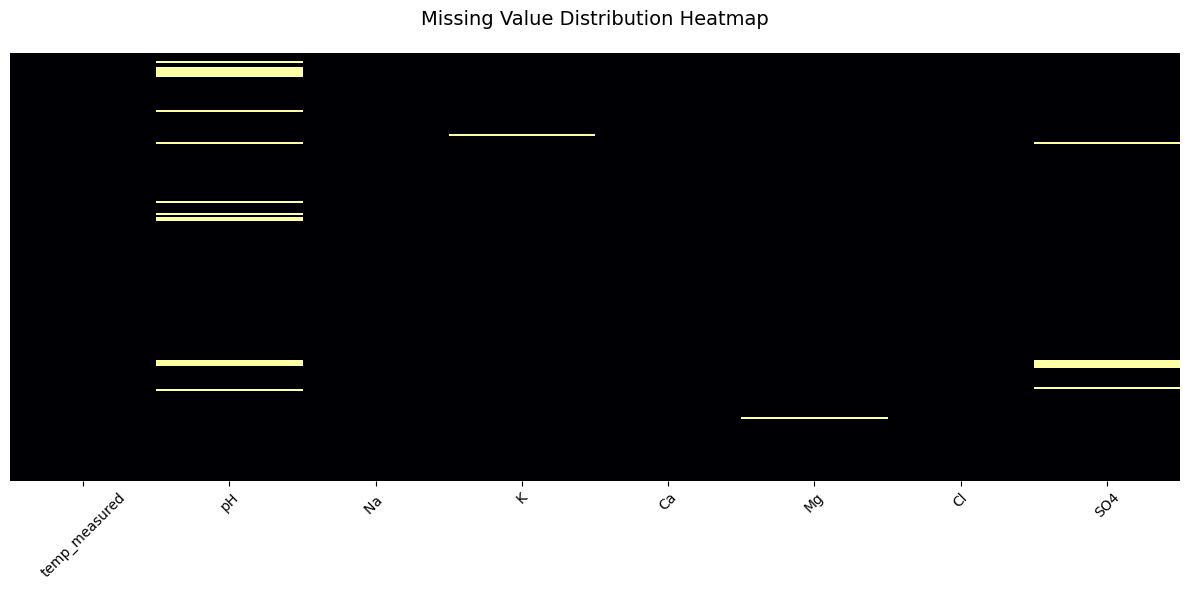


MISSING VALUES BY PERCENTAGE RANGE

>>> Columns with <5% missing values:
------------------------------
well_sample: 0.00%
temp_measured: 0.00%
Na : 0.00%
K: 0.46%
Ca: 0.00%
Mg: 0.46%
Cl: 0.00%
SO4: 2.78%

>>> Columns with 5-30% missing values:
------------------------------
pH: 7.41%

>>> Columns with >30% missing values:
------------------------------
No features with >30% missing values



In [61]:
### Get missing value statistics 

missing_values = df.isnull().sum()
miss_perc = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, miss_perc.round(1)], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)

cols_less_5 = miss_perc[miss_perc < 5].index.tolist()
cols_5_to_30 = miss_perc[(miss_perc >=5) & (miss_perc < 30)].index.tolist()
cols_greater_30 = miss_perc[miss_perc >= 30].index.tolist()

print("="*50)
print("MISSING VALUE ANALYSIS RESULTS")
print("="*50)
print("\nMissing Value Summary:")
print("-"*20)
print(missing_data if not missing_data.empty else "No missing values found in the dataset")

plt.figure(figsize=(12, 6))
plt.title('Missing Value Distribution Heatmap', fontsize=14, pad=20)
cols_to_plot = [col for col in df.columns if col != 'well_sample']
sns.heatmap(df[cols_to_plot].isnull(), cbar=False, cmap='inferno', yticklabels=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

print("\n" + "="*50)
print("MISSING VALUES BY PERCENTAGE RANGE")
print("="*50)

print('\n>>> Columns with <5% missing values:')
print("-"*30)
if cols_less_5:
    for col in cols_less_5:
        print(f'{col}: {miss_perc[col]:.2f}%')
else:
    print('No features with <5% missing values')

print('\n>>> Columns with 5-30% missing values:')
print("-"*30)
if cols_5_to_30:
    for col in cols_5_to_30:
        print(f'{col}: {miss_perc[col]:.2f}%')
else:
    print('No features with 5-30% missing values')

print('\n>>> Columns with >30% missing values:')
print("-"*30)
if cols_greater_30:
    for col in cols_greater_30:
        print(f'{col}: {miss_perc[col]:.2f}%')
else:
    print('No features with >30% missing values')
print("\n" + "="*50)

# Handling missing values
### __For column with <5% missing__ 
Fill with median for numerical columns. The median is less afected by outliers compared to the mean.
The median is useful when dealing with skewed data or data containing outliers

Fill with the mode for categorical columns.

### __For columns with 5-30% missing__
Use the KNN imputer. It is a more sophisticated method for handling missing values compared to the simple imputation methods like mean or median. The KNN Imputer works as follow:
- Find k nearest neighbors based on other features.
- Uses these neighborsto etimate missing values.
- More robust than simple imputation methods.
- Preseves relationships between features.

Key Parameters:

n_neighbors=5,              # Number of neighbors to use
weights='uniform',          # Weight function ('uniform' or 'distance')
metric='nan_euclidean',     # Distance metric to use
copy=True                   # Whether to create copy of input data

Main advantajes

- Maintains feature relationships
- Better for data with strong correlations
- Handles both continuous and discrete values

### __For columns with >30%__
Consider dropping these columns

In [31]:
### Handling missing values

from sklearn.impute import KNNImputer

def clean_geochemical_data(df):
    """
    KNN and median imputation
    """

    df_clean = df.copy()
    
    missing_percent = df_clean.isnull().sum() / len(df_clean) * 100
    
    cols_less_5 = missing_percent[missing_percent < 5].index.tolist()
    cols_5_to_30 = missing_percent[(missing_percent >= 5) & (missing_percent < 30)].index.tolist()
    cols_to_drop = missing_percent[missing_percent > 30].index.tolist()
    
    # Drop columns with >30% missing values
    if cols_to_drop:
        print(f"Dropping columns with >30% missing values: {cols_to_drop}")
        df_clean = df_clean.drop(columns=cols_to_drop)
    
    # Columns with <5% missing values: MEDIAN imputation (median is more robust than mean)
    numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
    for col in cols_less_5:
        if col in numeric_cols:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # Columns with 5-30% missing values: KNN imputation
    numeric_cols_5_30 = [col for col in cols_5_to_30 if col in numeric_cols]
    if numeric_cols_5_30:
        imputer = KNNImputer(
            n_neighbors=5,
            weights='uniform',
            metric='nan_euclidean'
        )
        # Impute only the selected columns
        df_clean[numeric_cols_5_30] = pd.DataFrame(
            imputer.fit_transform(df_clean[numeric_cols_5_30]),
            columns=numeric_cols_5_30,
            index=df_clean.index
        )
    
    remaining_nulls = df_clean.isnull().sum()
    if remaining_nulls.any():
        print()
        print("\nRemaining missing values:")
        print(remaining_nulls[remaining_nulls > 0])
    else:
        print("="*50)
        print("\nAll missing values have been handled")
        print("="*50)
    
    return df_clean

df_clean = clean_geochemical_data(df)
print("\nDataset shape after cleaning:", df_clean.shape)

# Save cleaned dataset
cleaned_file = 'csv/final_dataset.csv'
df_clean.to_csv(cleaned_file, index=False)
print(f"\nCleaned data saved to: {cleaned_file}")


All missing values have been handled

Dataset shape after cleaning: (216, 9)

Cleaned data saved to: csv/final_dataset.csv


## __Outliers treatment techniques__

### Counting outliers

__1. Z-Score Method__

The Z-score measures how many standard deviations a data point is from the mean. Outliers are typically defined as points where the absolute Z-score is greater than a threshold (usually 3). Capping preserves data range but may create artificial peaks.

__2. IQR (Interquartile Range) Method__

This method uses the interquartile range to identify outliers. Values below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers.

### Handling outliers

#### __1. Capping (Winsorization)__
Capping replaces extreme values with a maximum (cap) or minimum (floor) threshold, typically based on percentiles: e.g., 1st and 99th.

#### __2. Log Transformation__
Applies a logarithmic transformation to compress the range of data, especially useful for right-skewed distributions with large positive outliers. Note: This only works on positive values. Use log1p(x) (i.e., log(x + 1)) for zero-including data.

#### __3. Robust Scaler__
Scales data using the median and IQR instead of mean and standard deviation, making it _less sensitive to outliers_. Scales features using statistics that are robust to outliers, centers using median and scales using IQR. Robust scaling maintains relative relationships while reducing outlier impact.

#### __4. Transformation with Box-Cox or Yeo-Johnson (Power Tranformations)__
These are power transformations that can reduce skewness and normalize the distribution. Yeo-Johnson supports zero or negative values; Box-Cox does not. Helps normalize skewed distributions. Yeo-Johnson handles non-positive values appropriatelly, use Box-cox for strictly positive data.

___Consider robust scaling when outliers are important but extreme values need to be dampened.___

___Remeber to examine the transformed data distributions and choose the method that best suits analisys needs while preserving important characteristics of geochemical data.___

#### __5. Removing Outliers__
Directly remove the data points identified as outliers using methods like Z-score or IQR.

___Validation:___ Always validate your treatment choice by: checking distributions before and after, assessing impact on relationships between variables, evaluating effect on your final analysis goals.

___Documentation:___ Keep track of which outliers were treated and how, as this information might be important for interpretation of results.

### __Scaling Features (Input Variables)__

Using algorithms sensitive to feature scales (e.g., neural networks, SVM, k-NN).
Features are on different scales.
Features have significantly different ranges.
You want to prevent features with larger ranges from dominating those with smaller ranges.

### __Scaling Target Variable (Output Variable)__
___!___ It depends on your specific case:

### __Regression Problems:__

- Generally not recommended to scale the target.
- Makes model interpretation more difficult.
- Requires inverse transformation to get real predictions.
- Original scale predictions are often more meaningful.

_Special cases where scaling the target might help:_
    When the target variable has extreme values/outliers.
    In neural networks when the target range is very large.
    When using certain loss functions that are sensitive to scale.

### __Best Practice Recommendation:__

1. Scale your features using RobustScaler or StandardScaler
2. Keep your target variable in its original scale unless you have a specific reason
3. If you must scale the target:
   - Document the scaling parameters.
   - Always inverse transform predictions.
   - Consider the impact on model interpretation.

IQR method counting outliers

Outliers in temp_measured:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -172.50
Upper bound: 479.50
Min outlier value: nan
Max outlier value: nan

Outliers in pH:
Number of outliers: 1
Percentage of outliers: 0.46%
Lower bound: 3.47
Upper bound: 11.01
Min outlier value: 3.10
Max outlier value: 3.10

Outliers in Na :
Number of outliers: 7
Percentage of outliers: 3.24%
Lower bound: -21718.81
Upper bound: 36792.09
Min outlier value: 36800.00
Max outlier value: 64000.00

Outliers in K:
Number of outliers: 34
Percentage of outliers: 15.74%
Lower bound: -1231.97
Upper bound: 2105.03
Min outlier value: 2200.00
Max outlier value: 5493.00

Outliers in Ca:
Number of outliers: 39
Percentage of outliers: 18.06%
Lower bound: -2139.50
Upper bound: 3576.90
Min outlier value: 4810.00
Max outlier value: 11700.00

Outliers in Mg:
Number of outliers: 14
Percentage of outliers: 6.48%
Lower bound: -208.06
Upper bound: 346.92
Min outlier value: 351.42
Max ou

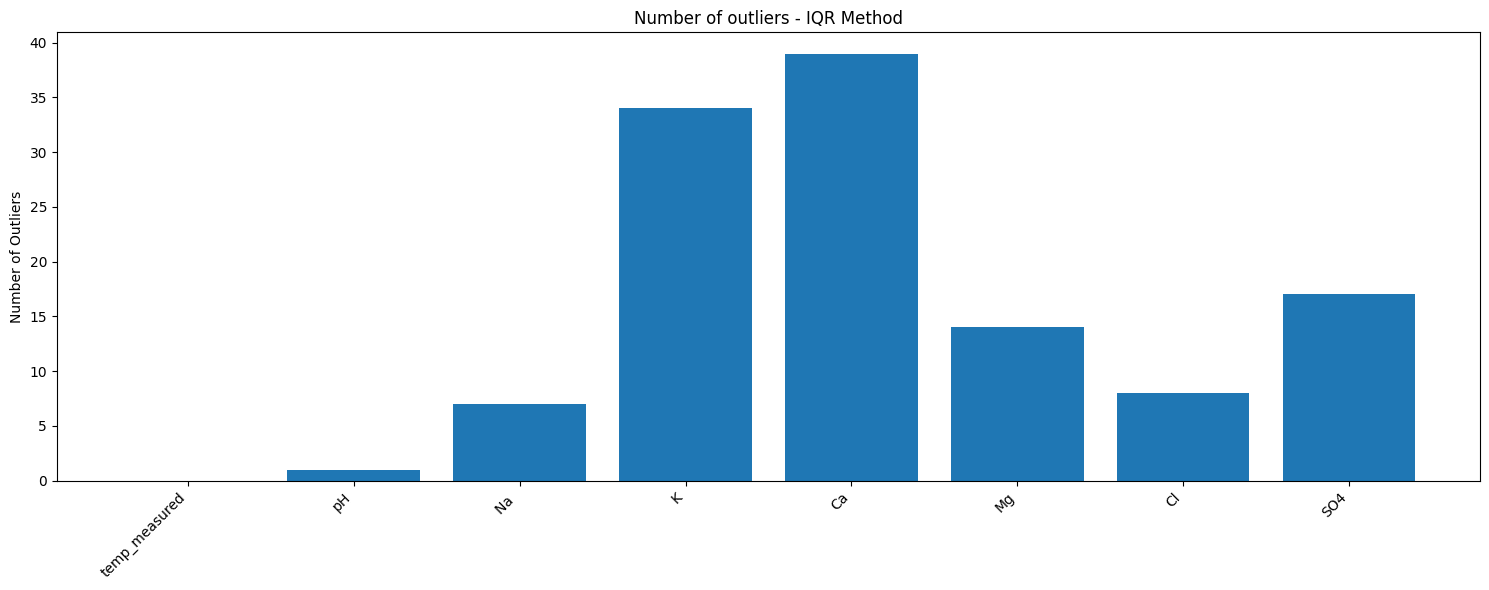


Sorted summary of outliers:
Ca: 39 outliers (18.06% of data)
K: 34 outliers (15.74% of data)
SO4: 17 outliers (7.87% of data)
Mg: 14 outliers (6.48% of data)
Cl: 8 outliers (3.70% of data)
Na : 7 outliers (3.24% of data)
pH: 1 outliers (0.46% of data)
temp_measured: 0 outliers (0.00% of data)


In [36]:
### Counting outliers: IQR or Z-score method

counting_method = 'IQR'         # 'IQR' or 'Z-score'

if counting_method == 'IQR':
    print('='*50)
    print('IQR method counting outliers')
    print('='*50)
    def count_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
        print(f"\nOutliers in {column}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers)/len(df[column])*100):.2f}%")
        print(f"Lower bound: {lower_bound:.2f}")
        print(f"Upper bound: {upper_bound:.2f}")
        print(f"Min outlier value: {outliers.min():.2f}")
        print(f"Max outlier value: {outliers.max():.2f}")
        
        return len(outliers)

    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    outliers_summary = {}
    for column in numeric_cols:
        outliers_count = count_outliers(df, column)
        outliers_summary[column] = outliers_count

    plt.figure(figsize=(15, 6))
    plt.bar(outliers_summary.keys(), outliers_summary.values())
    plt.xticks(rotation=45, ha='right')
    plt.title('Number of outliers - IQR Method')
    plt.ylabel('Number of Outliers')
    plt.tight_layout()
    plt.show()
    
    print('='*50)
    print("\nSorted summary of outliers:")
    print('='*50)
    sorted_outliers = dict(sorted(outliers_summary.items(), key=lambda x: x[1], reverse=True))
    for column, count in sorted_outliers.items():
        print(f"{column}: {count} outliers ({(count/len(df)*100):.2f}% of data)")
        
elif counting_method == 'Z-score':
    print('='*50)
    print('Z-score method counting outliers')
    print('='*50)

    def count_outliers_zscore(df, column, threshold=3):
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers = df[z_scores > threshold][column]
        
        print(f"\nOutliers in {column}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers)/len(df[column])*100):.2f}%")
        print(f"Z-score threshold: ±{threshold}")
        print(f"Min outlier value: {outliers.min():.2f}")
        print(f"Max outlier value: {outliers.max():.2f}")
        
        return len(outliers)

    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    outliers_summary = {}
    for column in numeric_cols:
        outliers_count = count_outliers_zscore(df, column)
        outliers_summary[column] = outliers_count

    plt.figure(figsize=(15, 6))
    plt.bar(outliers_summary.keys(), outliers_summary.values())
    plt.xticks(rotation=45, ha='right')
    plt.title('Number of outliers - Z-score Method')
    plt.ylabel('Number of Outliers')
    plt.tight_layout()
    plt.show()

    print('='*50)
    print("Sorted summary of outliers (Z-score method):")
    print('='*50)
    sorted_outliers = dict(sorted(outliers_summary.items(), key=lambda x: x[1], reverse=True))
    for column, count in sorted_outliers.items():
        print(f"{column}: {count} outliers ({(count/len(df)*100):.2f}% of data)")

In [40]:
### Handling outliers function definition

### Outlier treatment method A: Capping (Winssorization)
def treat_outliers_capping(df, columns, target_col, method='iqr', k=1.5):
    df_capped = df.copy()
    feature_cols = [col for col in columns if col != target_col]
    for column in feature_cols:
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR
        elif method == 'percentile':
            lower = df[column].quantile(0.01)
            upper = df[column].quantile(0.99)
        df_capped[column] = df_capped[column].clip(lower=lower, upper=upper)
    
    return df_capped

### Outlier treatment method B: Log Transformation
def treat_outliers_log(df, columns, target_col):
    df_transformed = df.copy()
    feature_cols = [col for col in columns if col != target_col]
    for column in feature_cols:
        min_val = df_transformed[column].min()
        if min_val <= 0:
            df_transformed[column] = np.log(df_transformed[column] - min_val + 1)
        else:
            df_transformed[column] = np.log(df_transformed[column])
    
    return df_transformed

### Outlier treatment method C: Robust Scaling
from sklearn.preprocessing import RobustScaler, PowerTransformer
def treat_outliers_robust_scaling(df, columns, target_col):
    df_scaled = df.copy()
    feature_cols = [col for col in columns if col != target_col]
    scaler = RobustScaler()
    df_scaled[feature_cols] = scaler.fit_transform(df_scaled[feature_cols])
    
    return df_scaled, scaler

### Outlier treatment method d: Yeo-Johnson Box-cox method or Power transformation
def treat_power_transform(df, columns, target_col, method='yeo-johnson'):
    """
    method : str, 'yeo-johnson' or 'box-cox'
    """
    df_transformed = df.copy()
    feature_cols = [col for col in columns if col != target_col]
    transformer = PowerTransformer(method=method, standardize=True)
    
    if method == 'box-cox':
        for col in feature_cols:
            if df_transformed[col].min() <= 0:
                print(f"Warning: {col} contains non-positive values. Shifting data.")
                df_transformed[col] = df_transformed[col] - df_transformed[col].min() + 1
    df_transformed[feature_cols] = transformer.fit_transform(df_transformed[feature_cols])
    
    return df_transformed, transformer

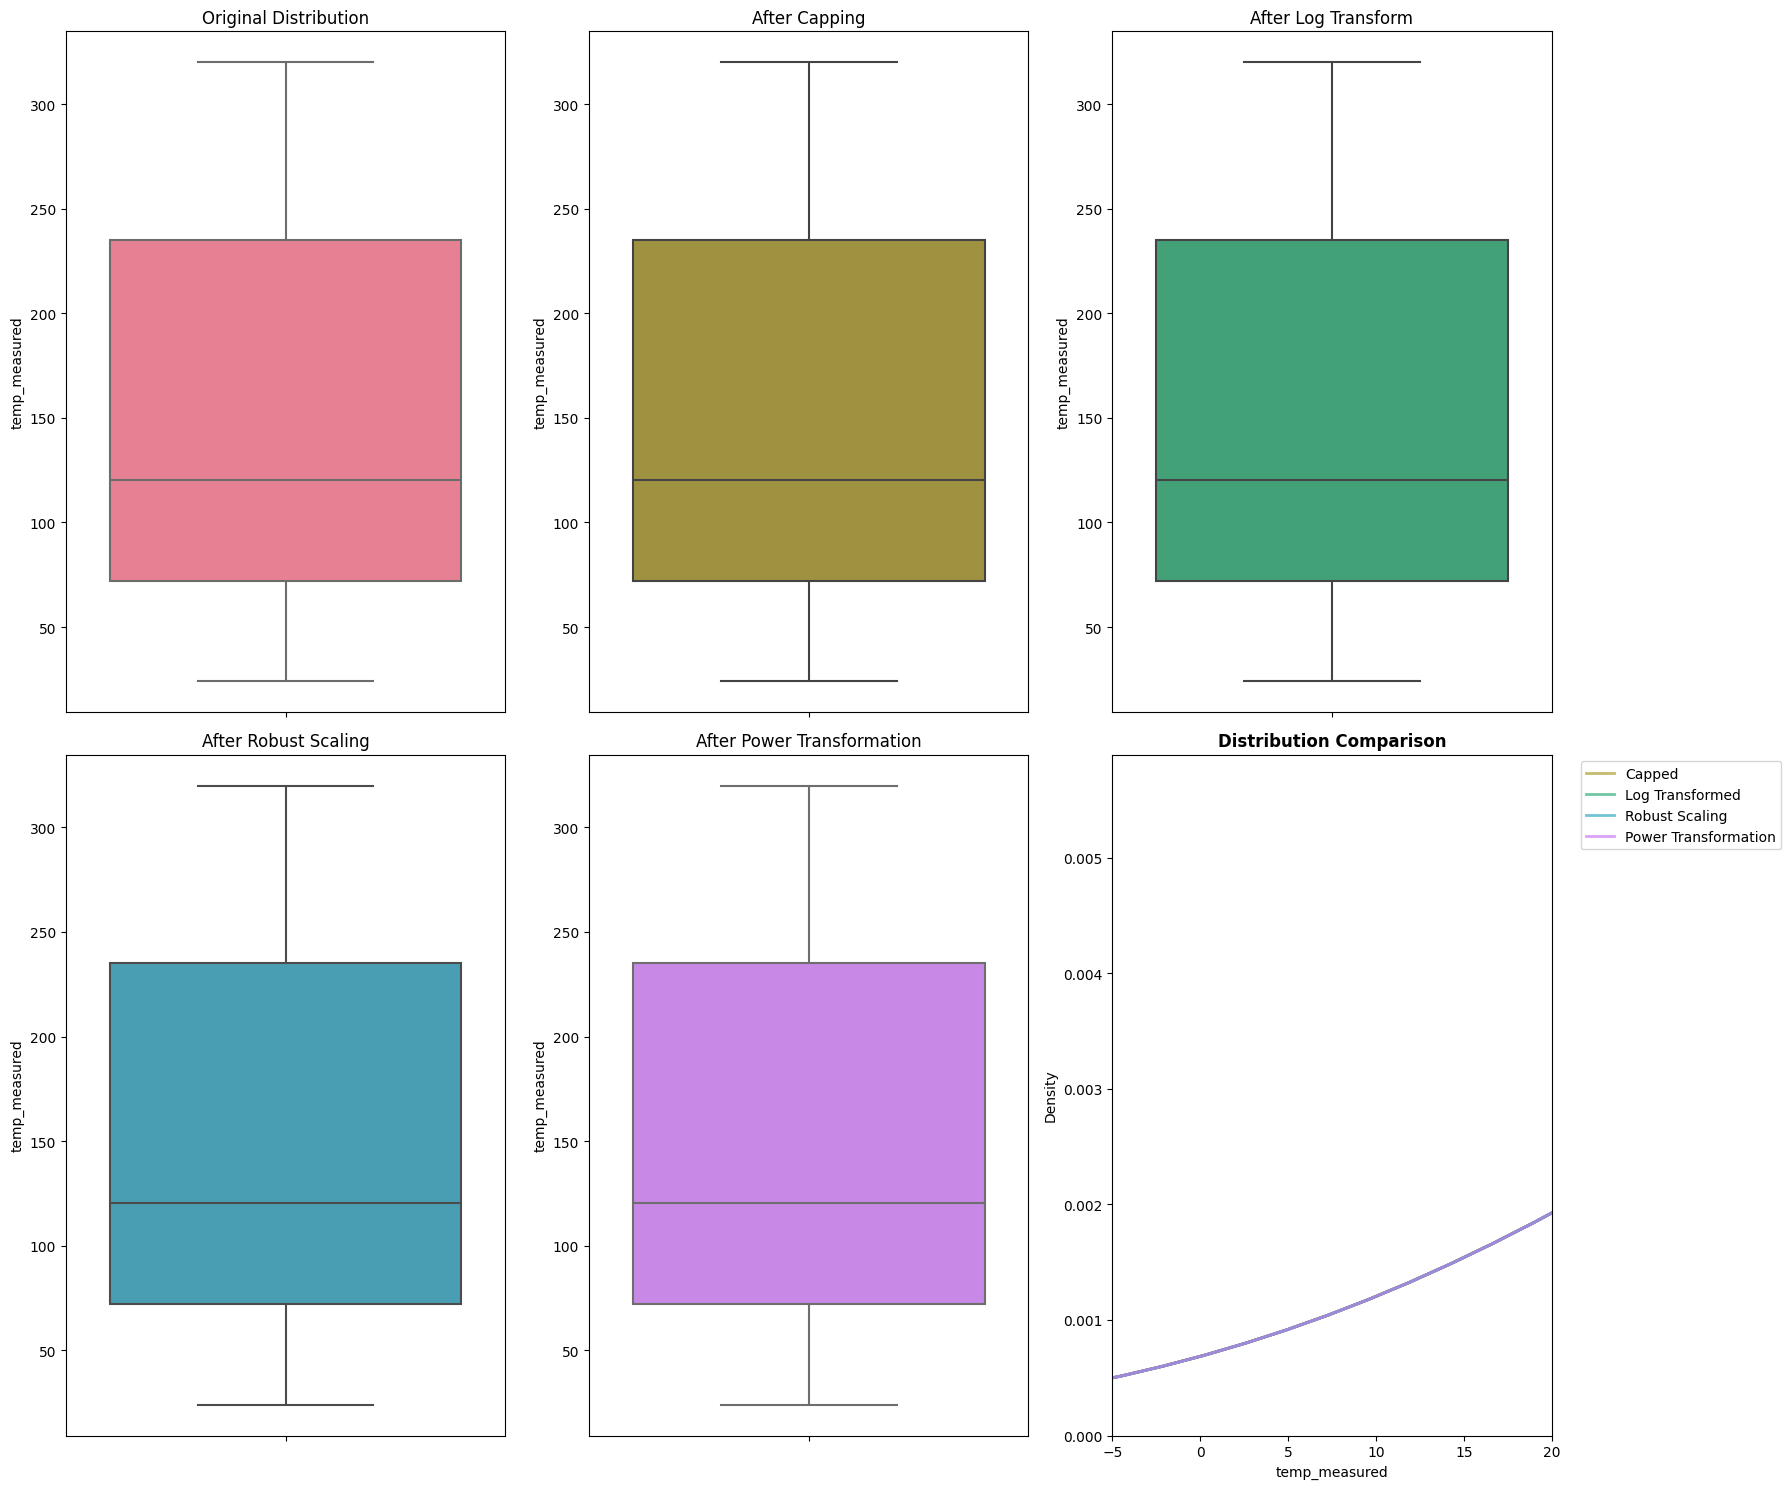

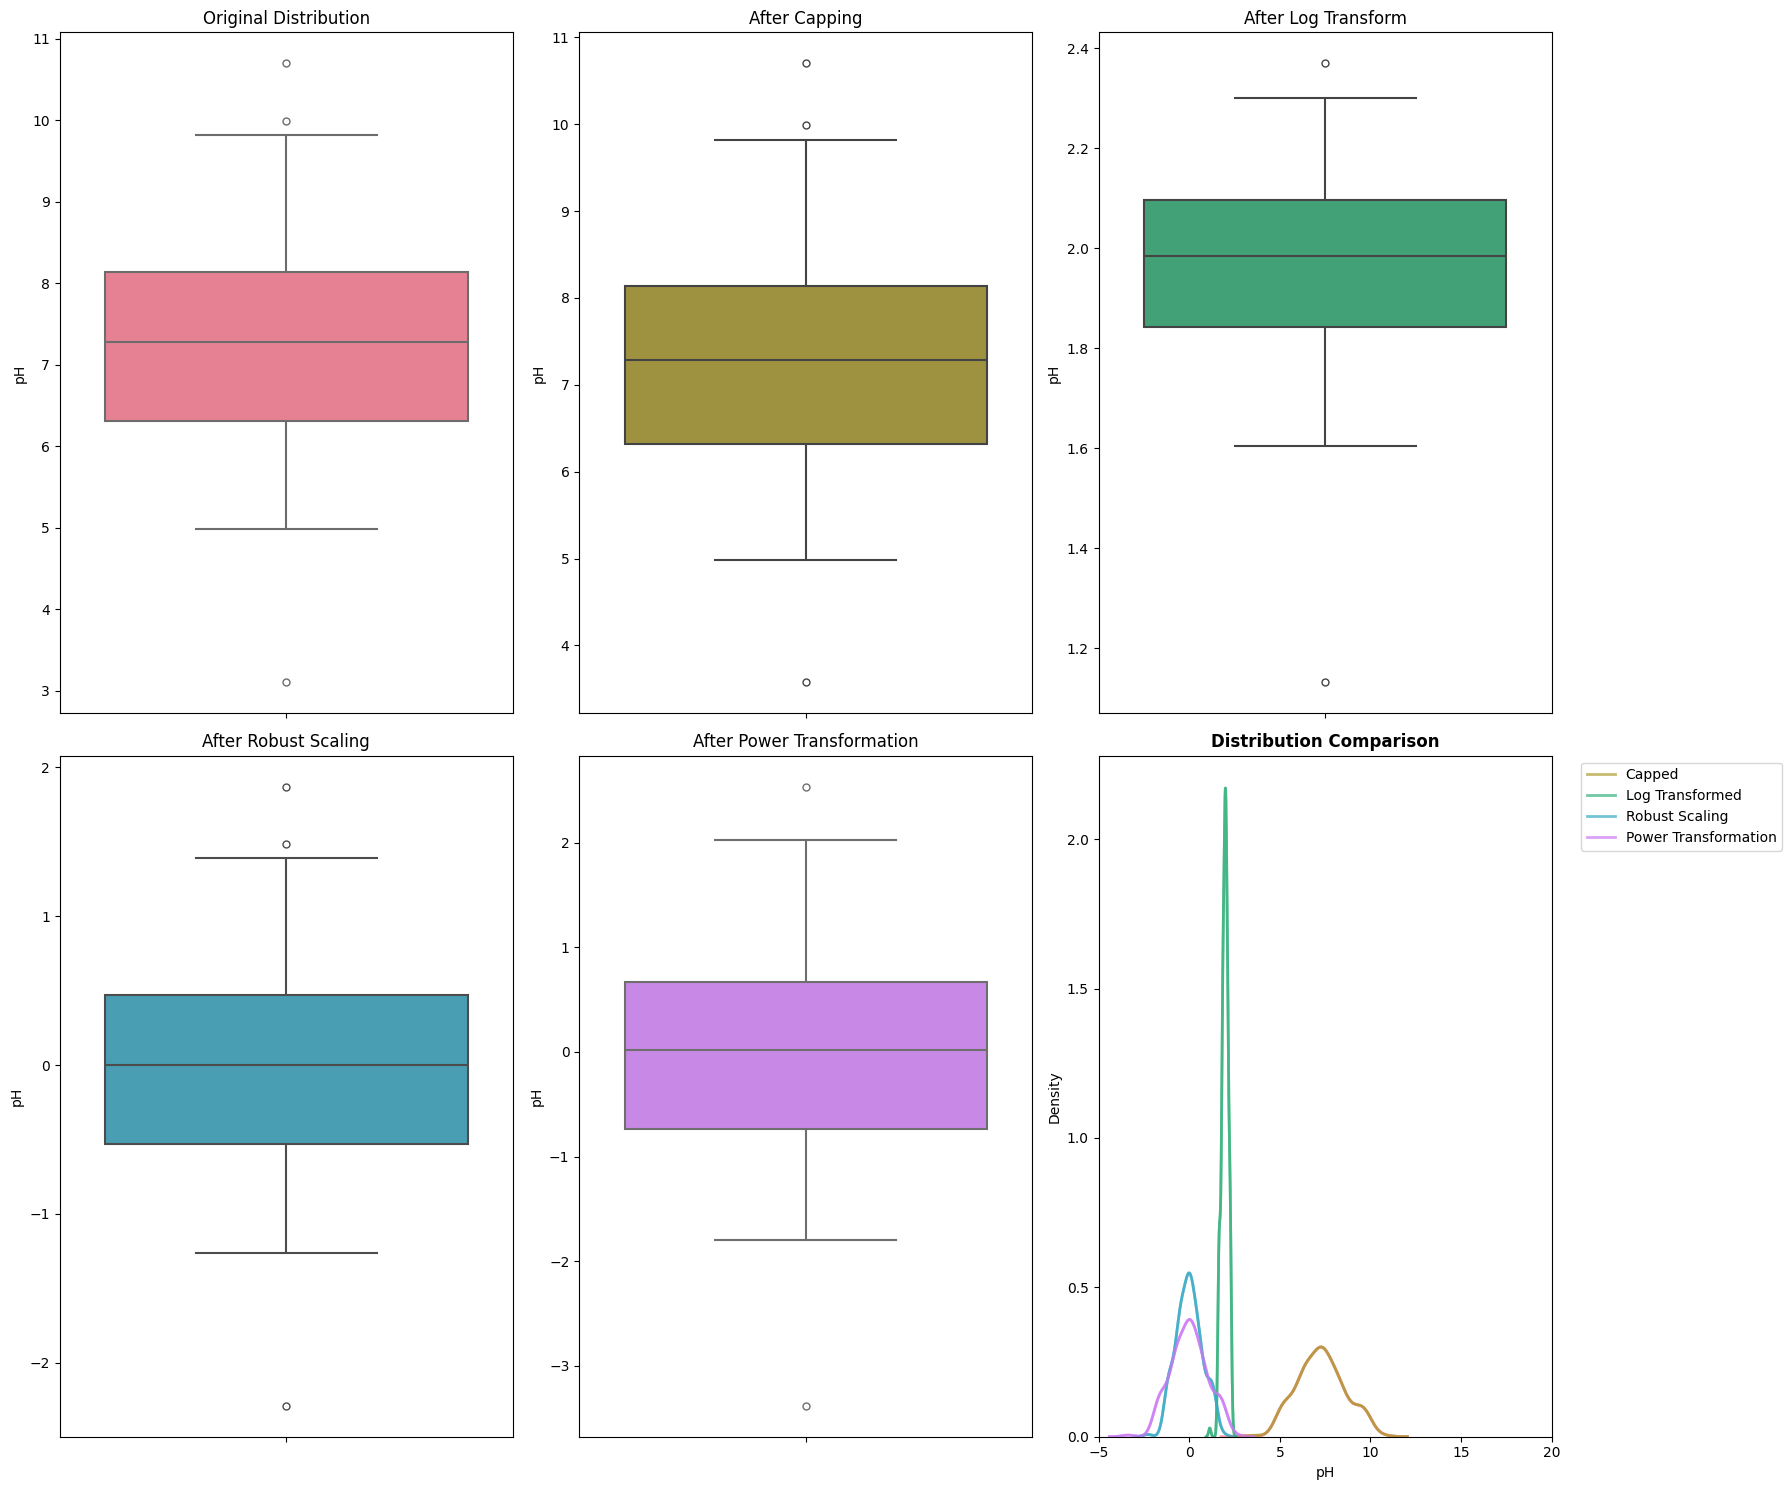

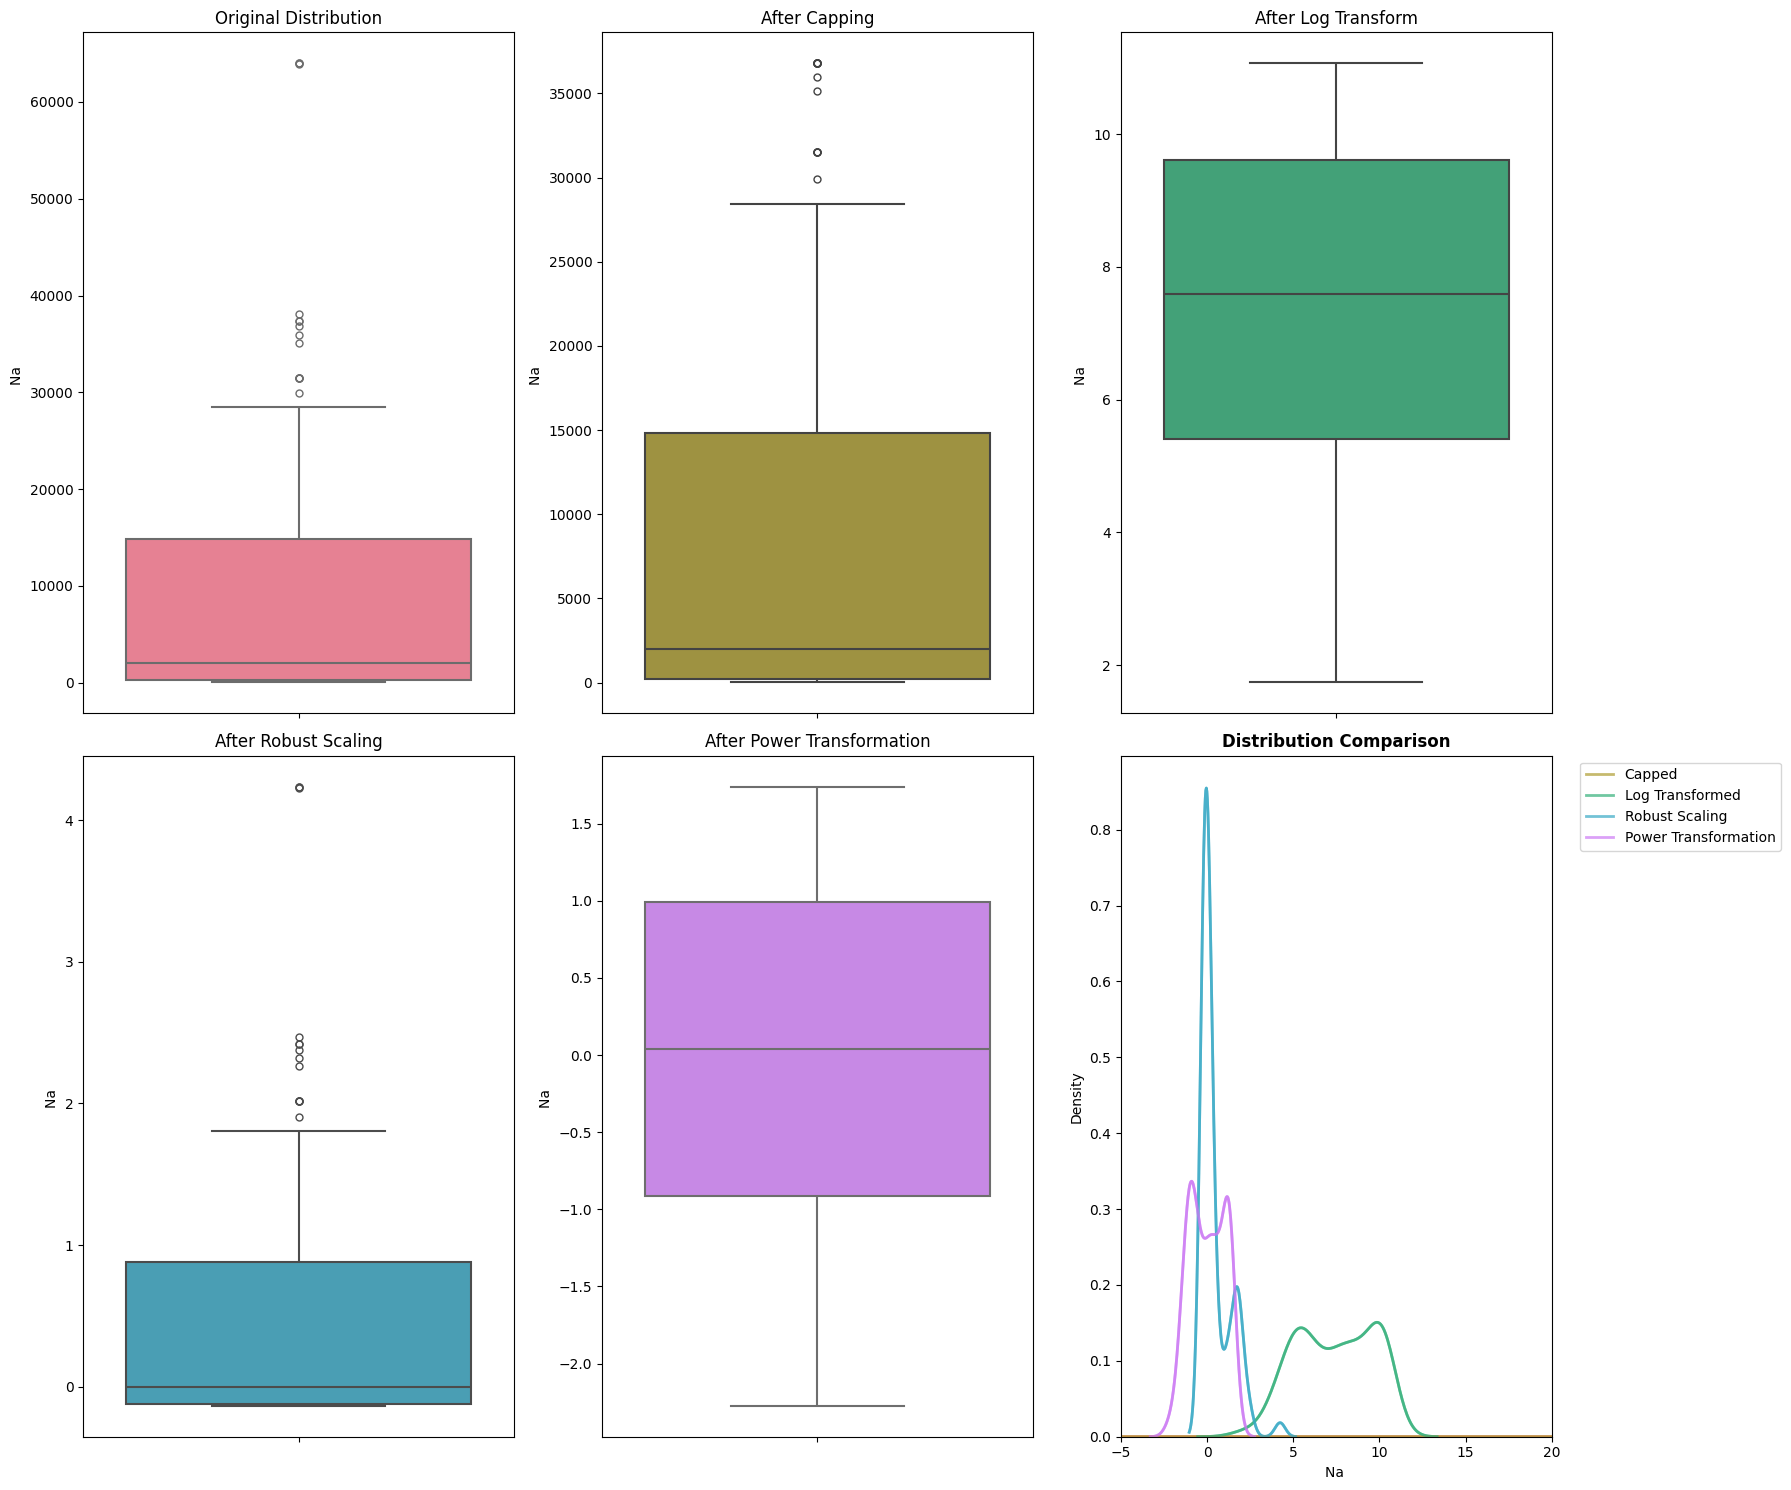

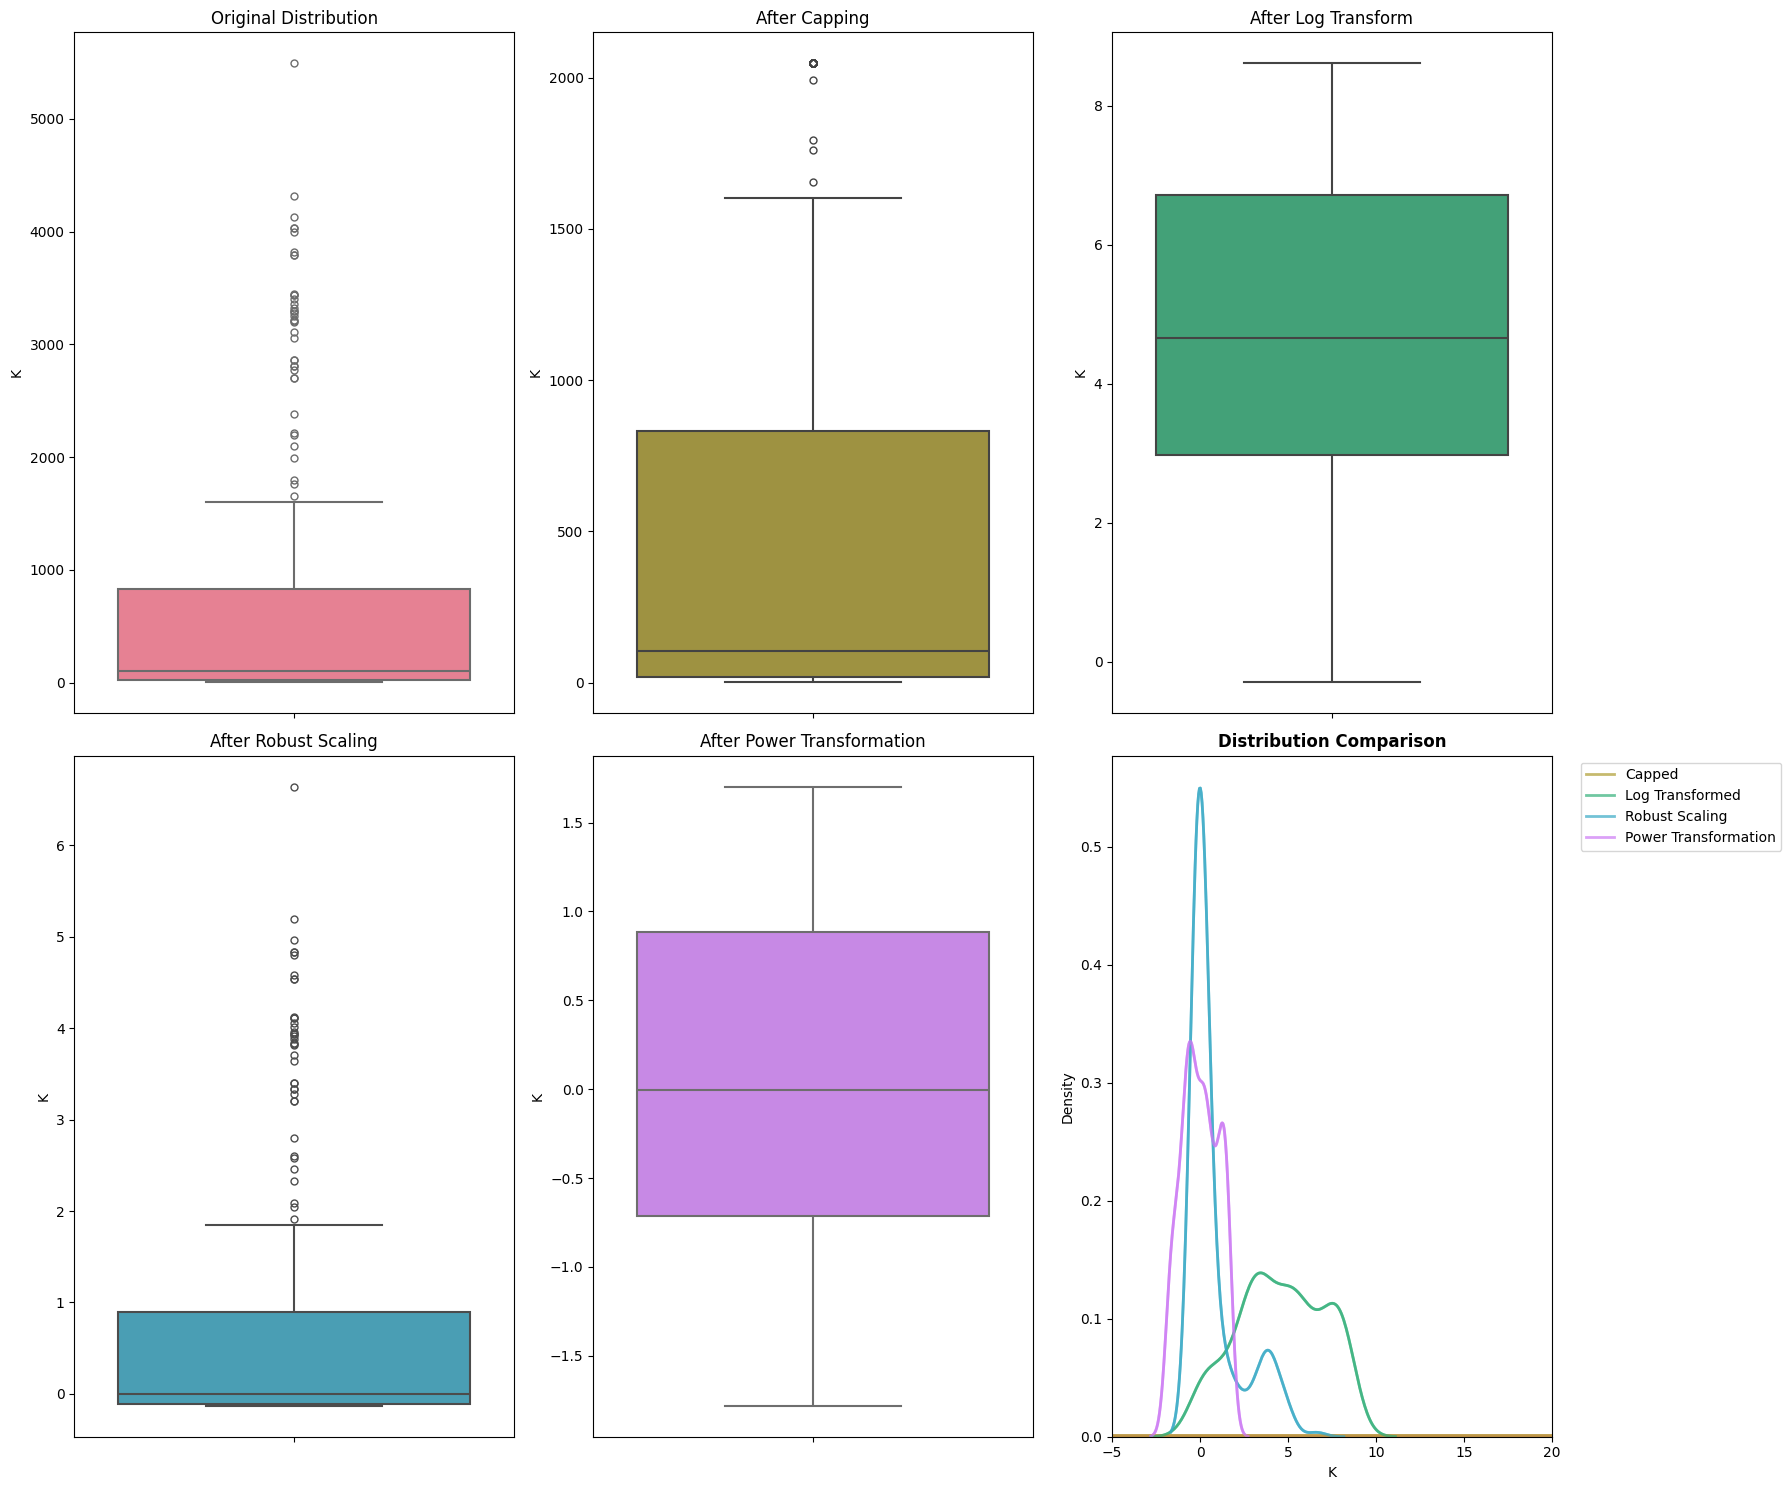

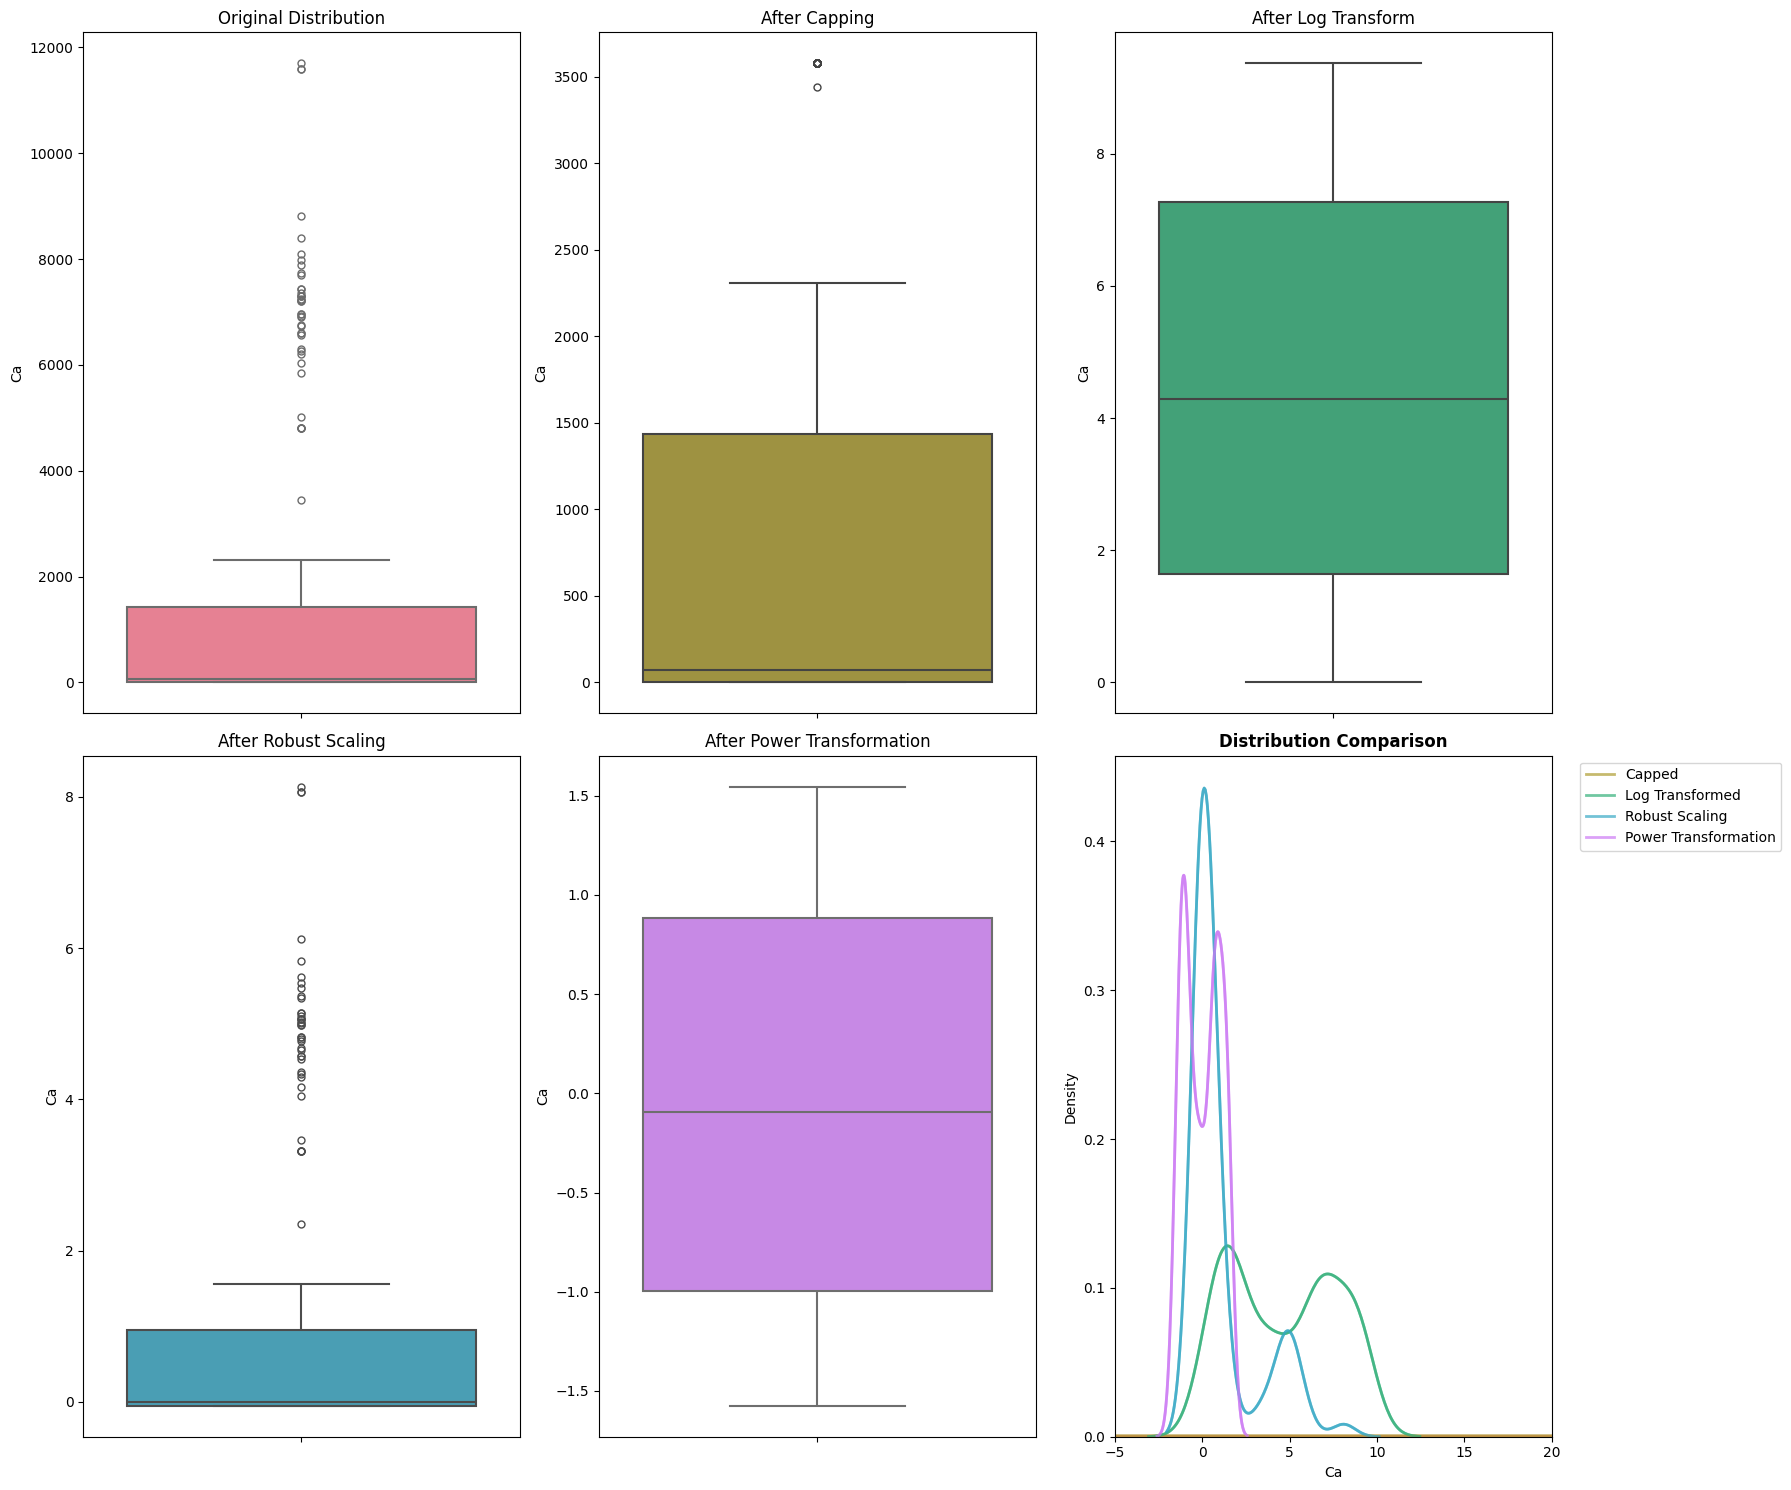

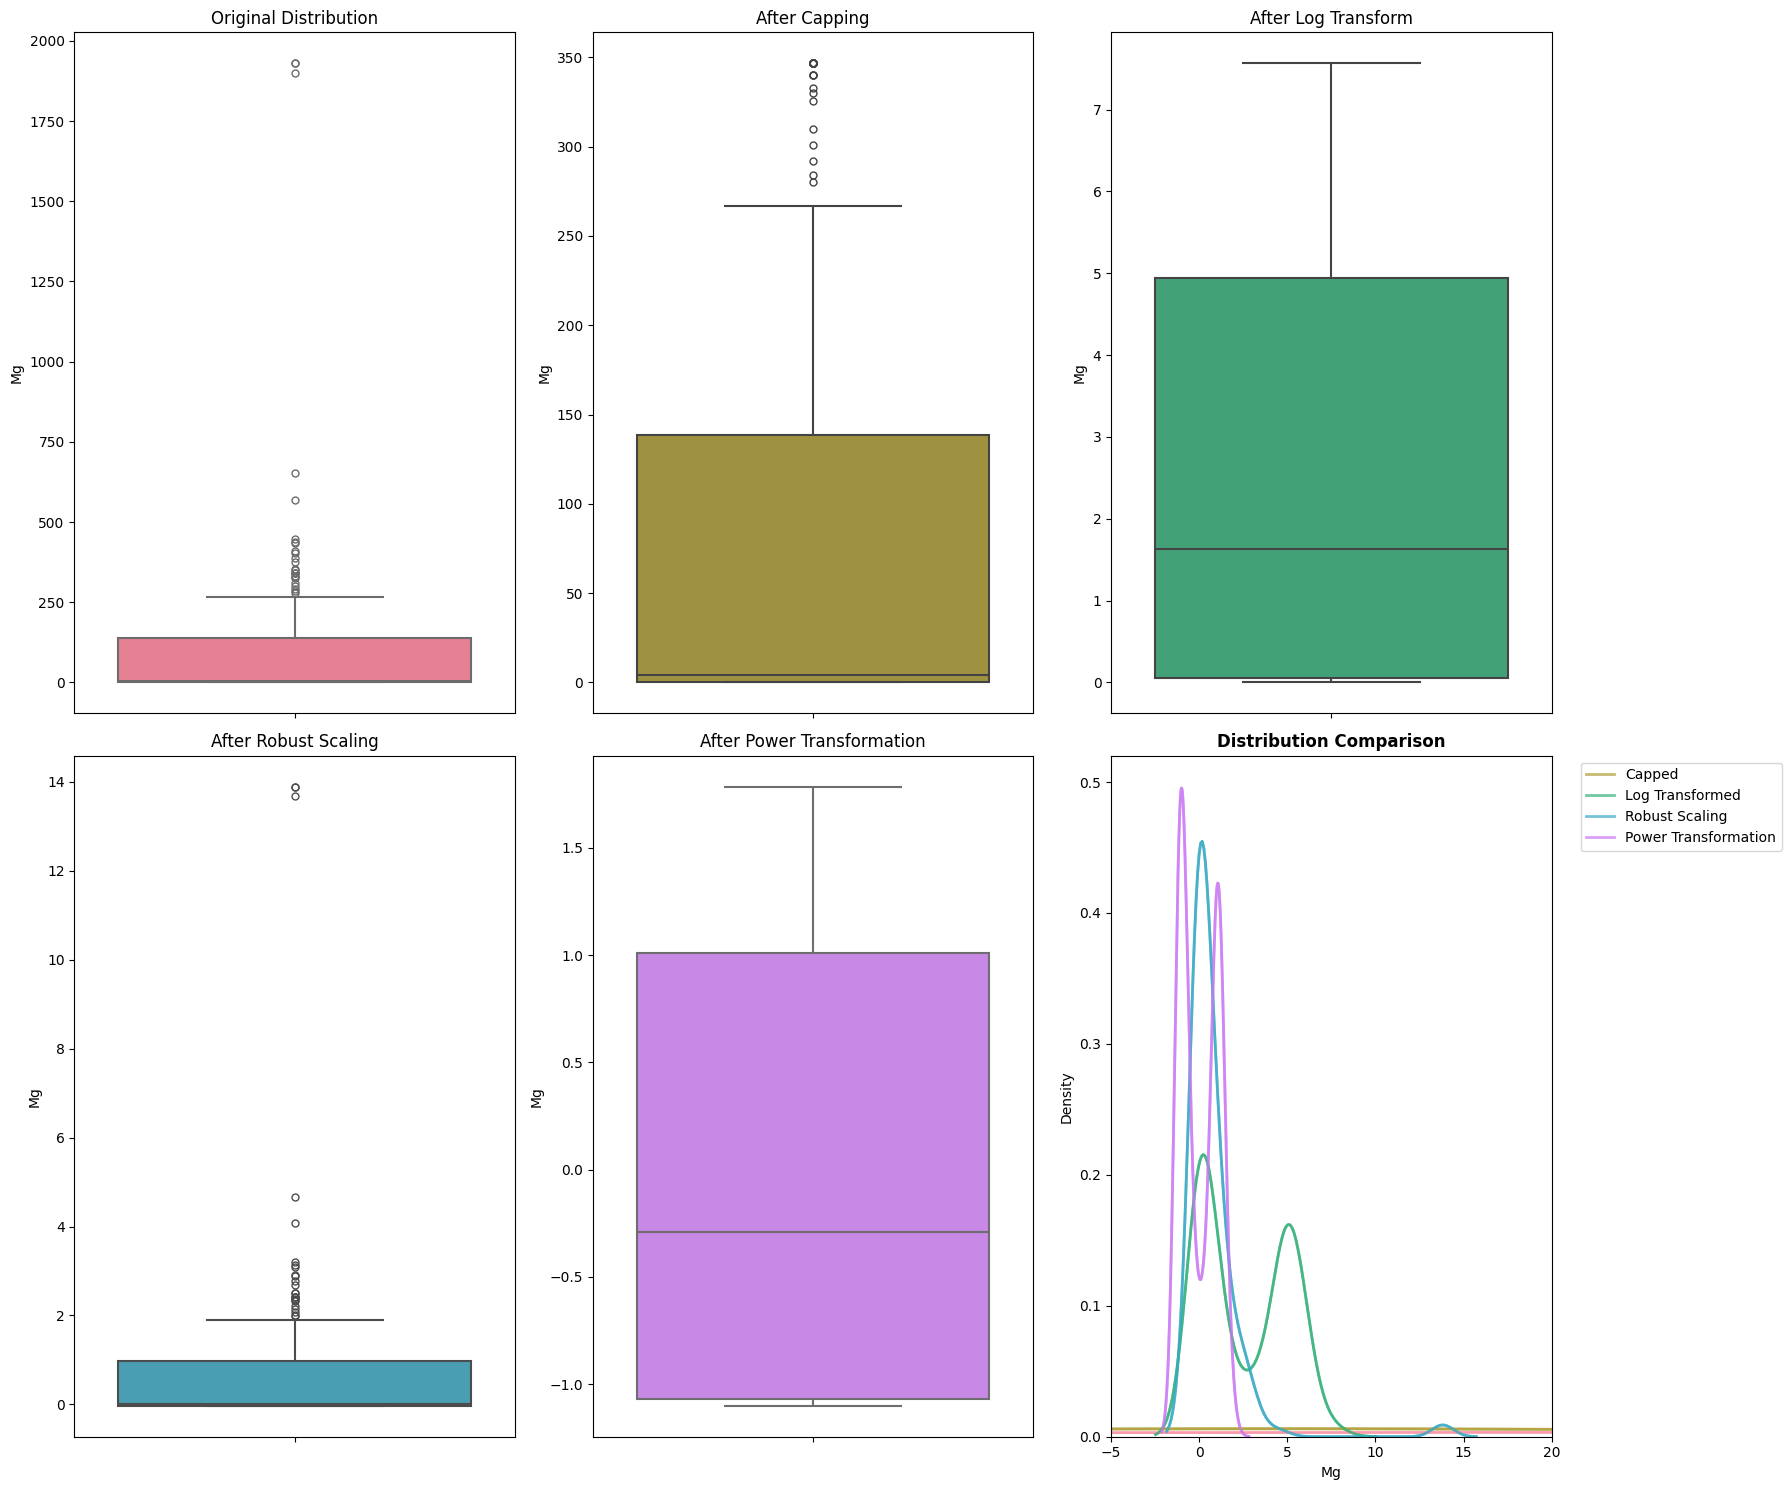

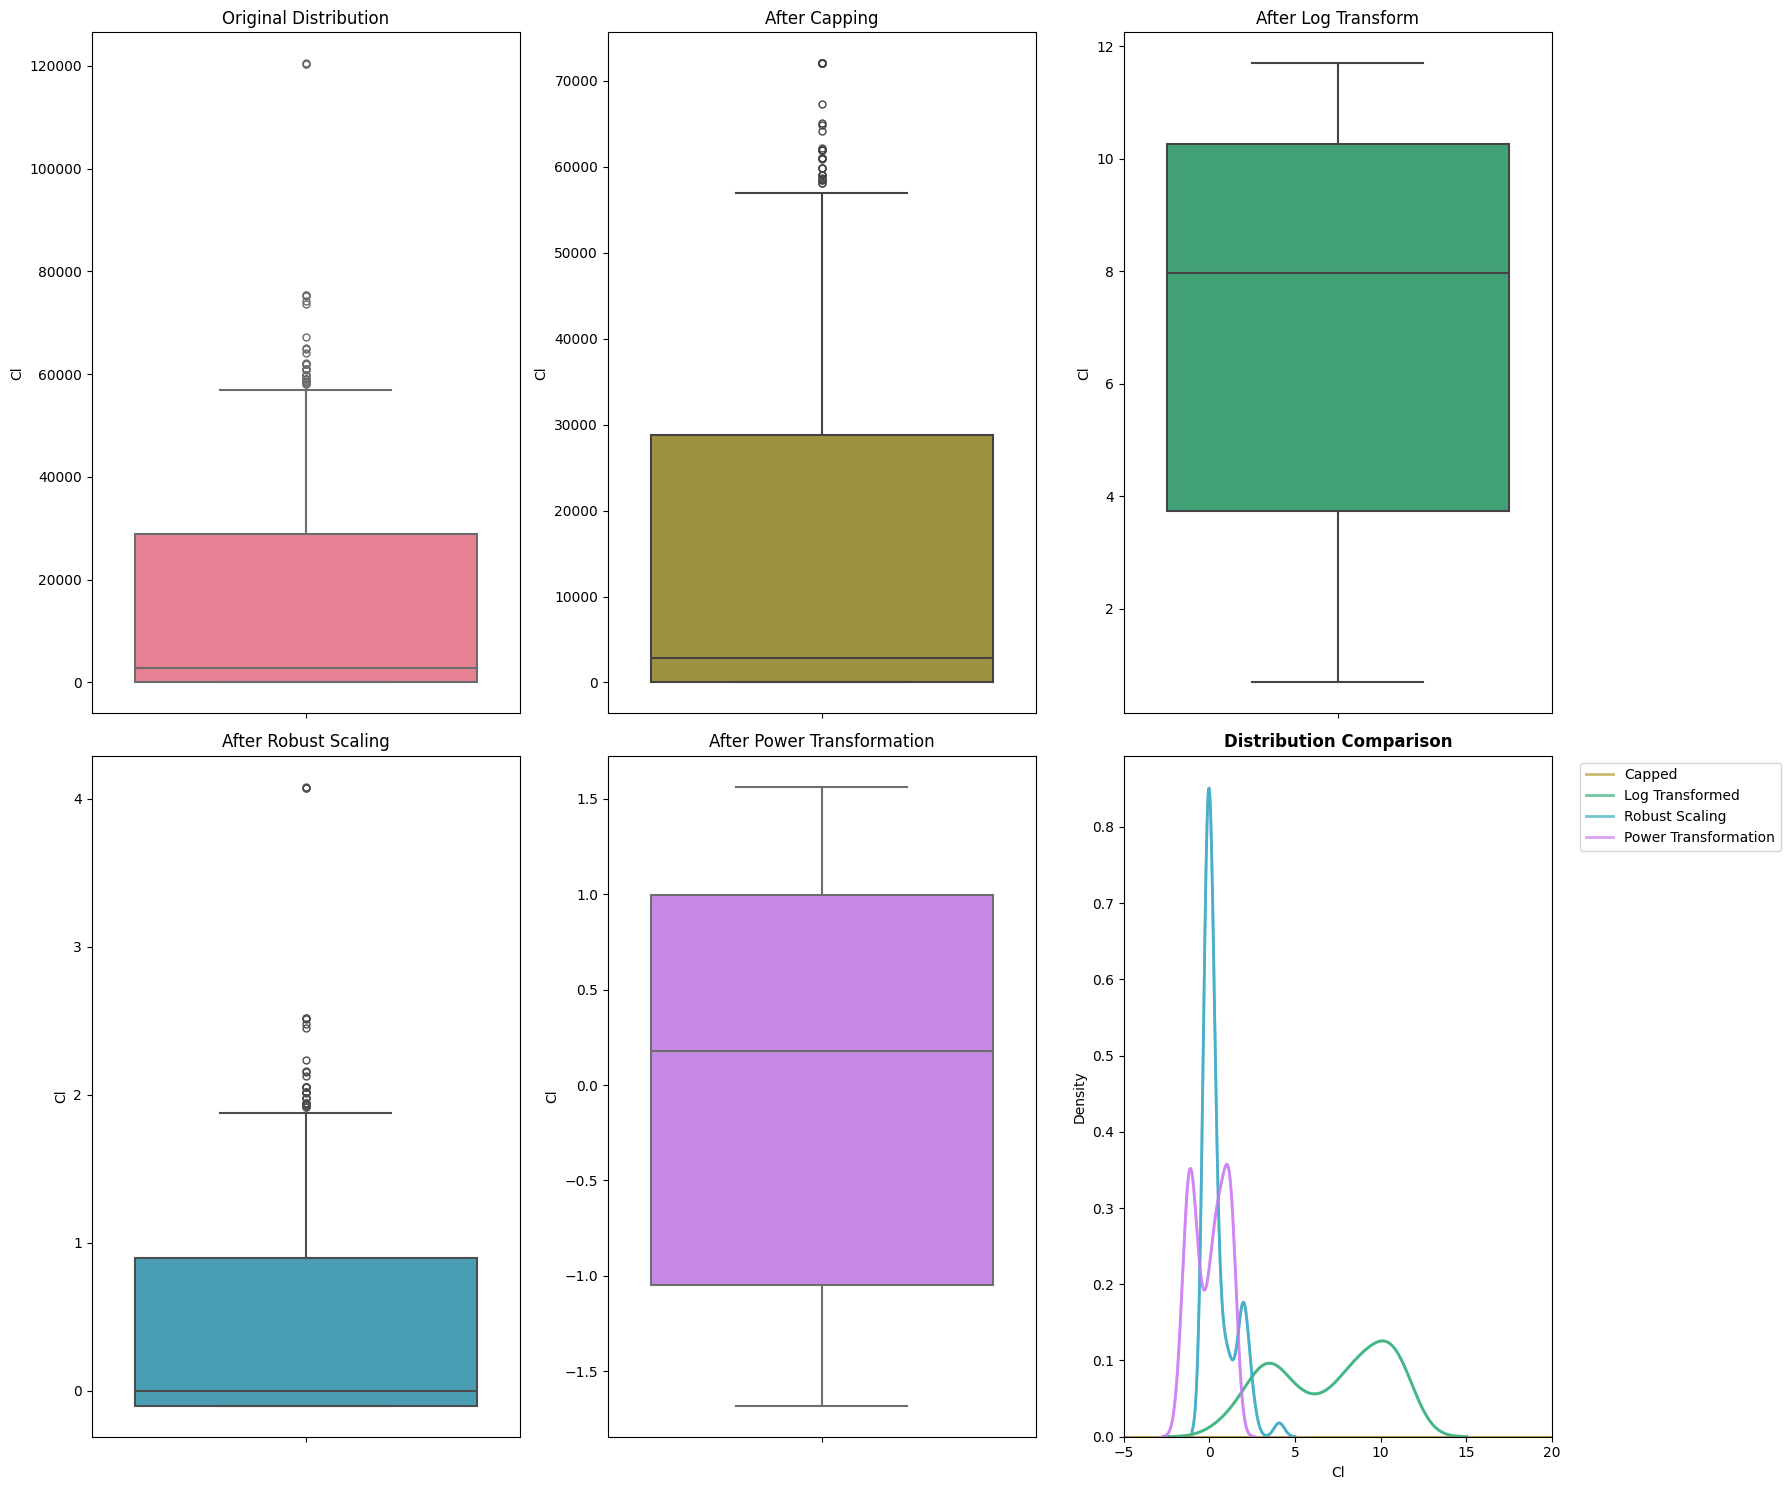

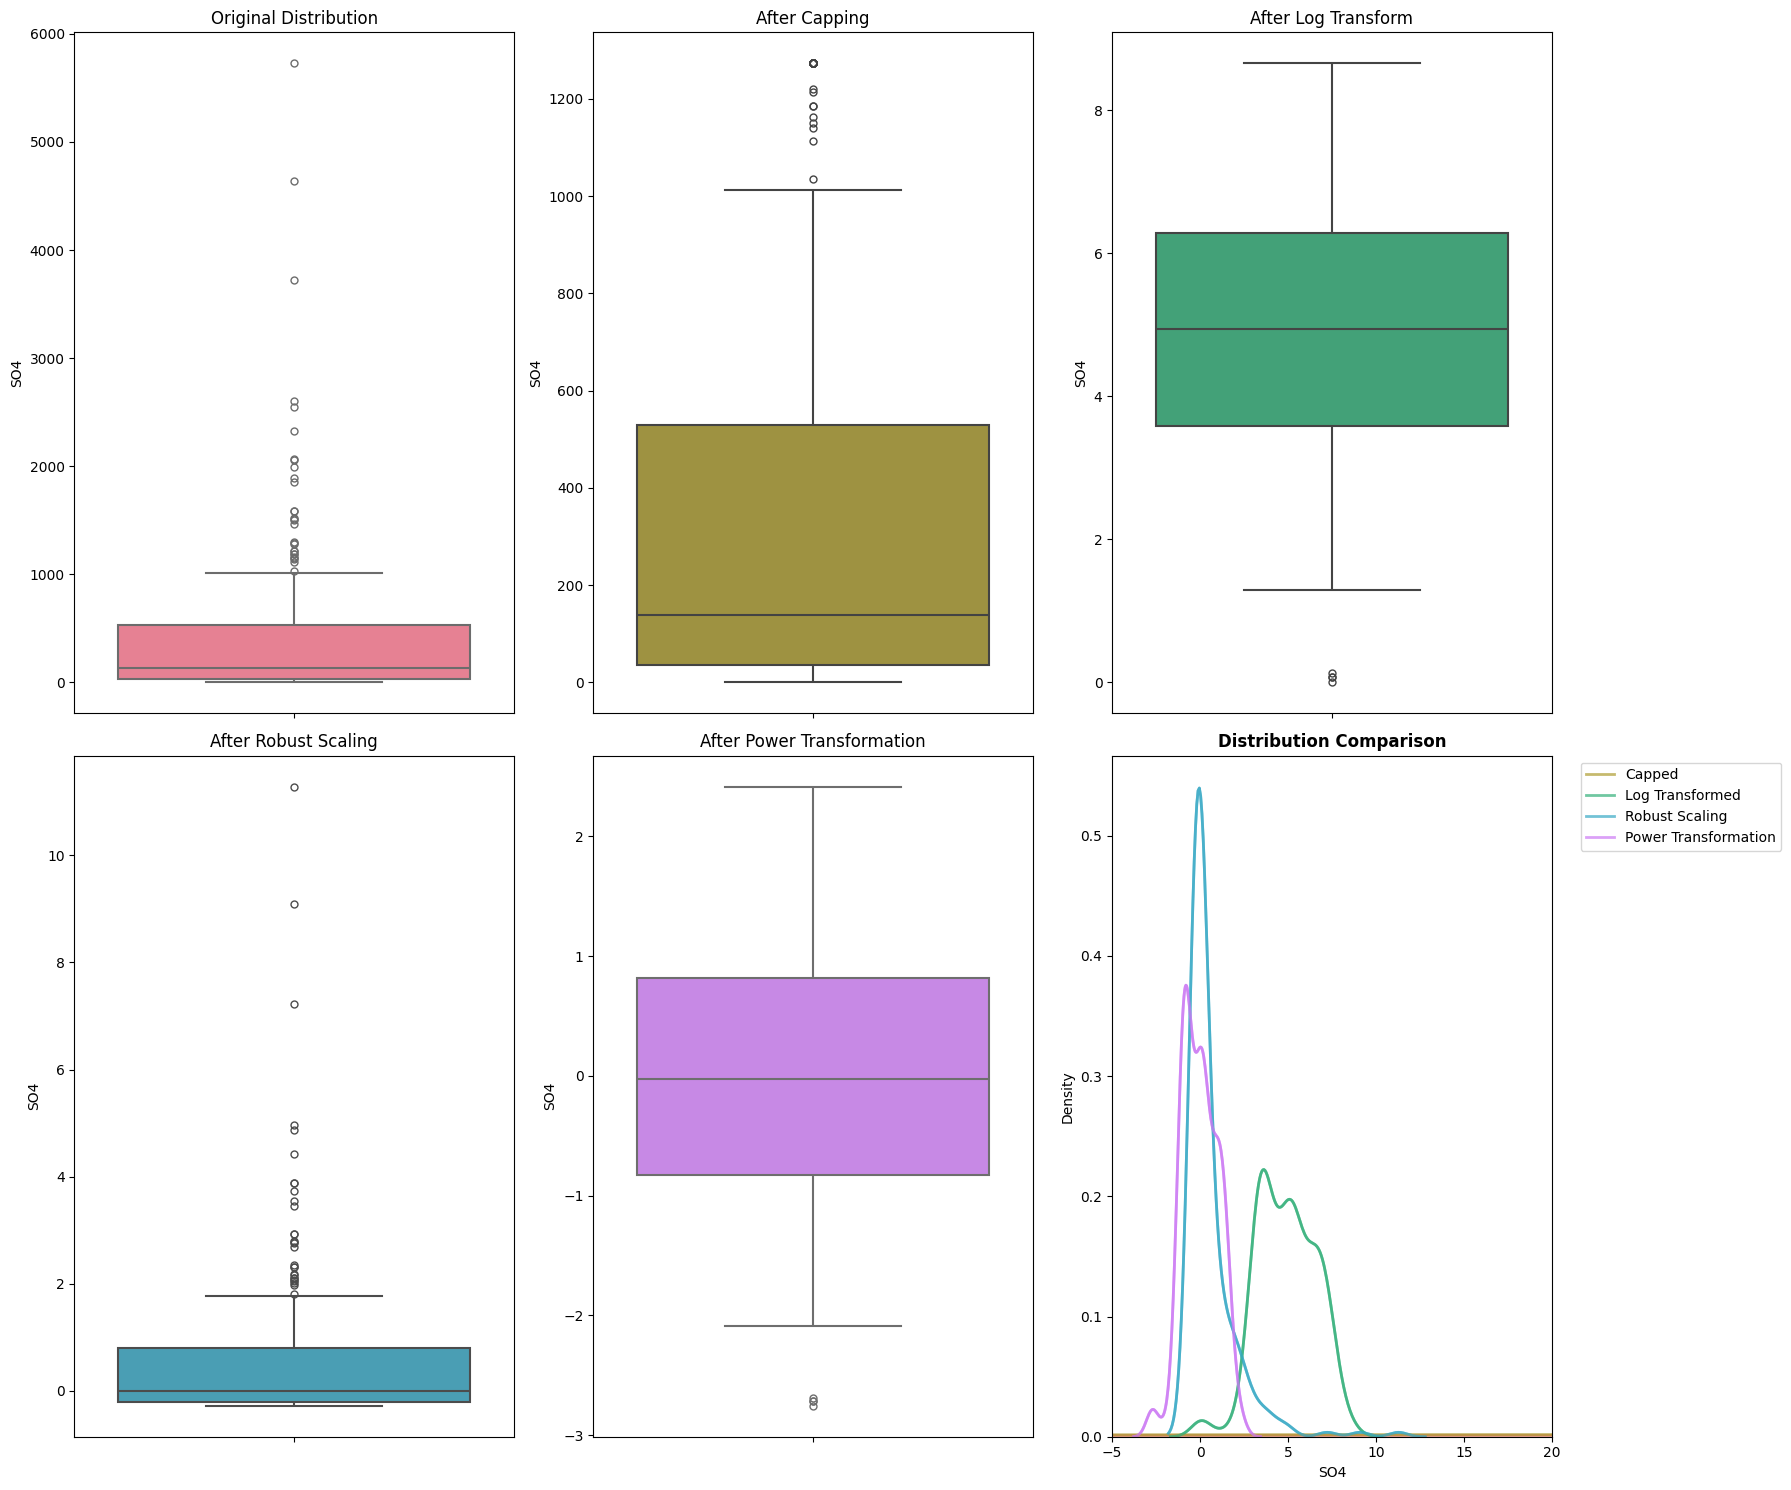

In [ ]:
### Outliers Visualization Analysis

def analyze_outlier_treatments(df, columns, target_column):
    """
    Compare different outlier treatment methods
    """
    colors = sns.color_palette("husl", 5)
    treatment_colors = {
        'original': colors[0],
        'capped': colors[1],
        'log_transformed': colors[2],
        'robust_scaling': colors[3],
        'power_transformation': colors[4]
    }
    treatments = {
        'original': df,
        'capped': treat_outliers_capping(df, columns, target_column),
        'log_transformed': treat_outliers_log(df, columns, target_column),
        'robust_scaling': treat_outliers_robust_scaling(df, columns, target_column)[0],
        'power_transformation': treat_power_transform(df, columns, target_column, method='yeo-johnson')[0]
    }
    
    for column in columns:
        fig, axes = plt.subplots(2, 3, figsize=(18, 15))
        #fig.suptitle(f'Outlier Treatment Comparison for {column}', fontsize=16, y=0.95)
        
        boxplot_props = {
            'showfliers': True,     
            'fliersize': 5,         
            'linewidth': 1.5,       
            'whis': 1,              
            'notch': False          
        }

        # Original distribution
        sns.boxplot(data=treatments['original'][column], ax=axes[0,0], 
                   color=treatment_colors['original'], **boxplot_props)
        axes[0,0].set_title('Original Distribution', fontsize=12)       # fontweight='bold'
        
        # Capped
        sns.boxplot(data=treatments['capped'][column], ax=axes[0,1], 
                   color=treatment_colors['capped'], **boxplot_props)
        axes[0,1].set_title('After Capping', fontsize=12) 
        
        # Log transformed
        sns.boxplot(data=treatments['log_transformed'][column], ax=axes[0,2], 
                   color=treatment_colors['log_transformed'], **boxplot_props)
        axes[0,2].set_title('After Log Transform', fontsize=12)
        
        # Robust scaling
        sns.boxplot(data=treatments['robust_scaling'][column], ax=axes[1,0], 
                   color=treatment_colors['robust_scaling'], **boxplot_props)
        axes[1,0].set_title('After Robust Scaling', fontsize=12)
        
        # Power transformation
        sns.boxplot(data=treatments['power_transformation'][column], ax=axes[1,1], 
                   color=treatment_colors['power_transformation'], **boxplot_props)
        axes[1,1].set_title('After Power Transformation', fontsize=12)
        
        # Distribution comparison
        for treatment, color in treatment_colors.items():
            if treatment != 'original':
                sns.kdeplot(
                    data=treatments[treatment][column],
                    ax=axes[1,2],
                    label=treatment.replace('_', ' ').title(),
                    color=color,
                    linewidth=2,
                    alpha=0.7
                )
        axes[1,2].set_title('Distribution Comparison', fontsize=12, fontweight='bold')
        axes[1,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1,2].set_xlim(-5, 20)

        for treatment, color in treatment_colors.items():            
            sns.kdeplot(
                data=treatments[treatment][column],
                ax=axes[1,2],
                label=treatment.replace('_', ' ').title(),
                color=color,
                linewidth=2,
                alpha=0.7
            )
        #axes[1,2].set_title('Distribution Comparison', fontsize=12, fontweight='bold')
        #axes[1,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()
        plt.close()
    return treatments

target_column = 'temp_measured' 
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

treated_dfs = analyze_outlier_treatments(df_clean, numeric_cols, target_column)

# Choose method 
treatment = 'capped' # 'original', 'capped', 'log_transformed', 'robust_scaling', 'power_transformation'
df_final = treated_dfs[treatment] 

# df_final.to_csv(f'csv/final_dataset_{treatment}.csv', index=False)

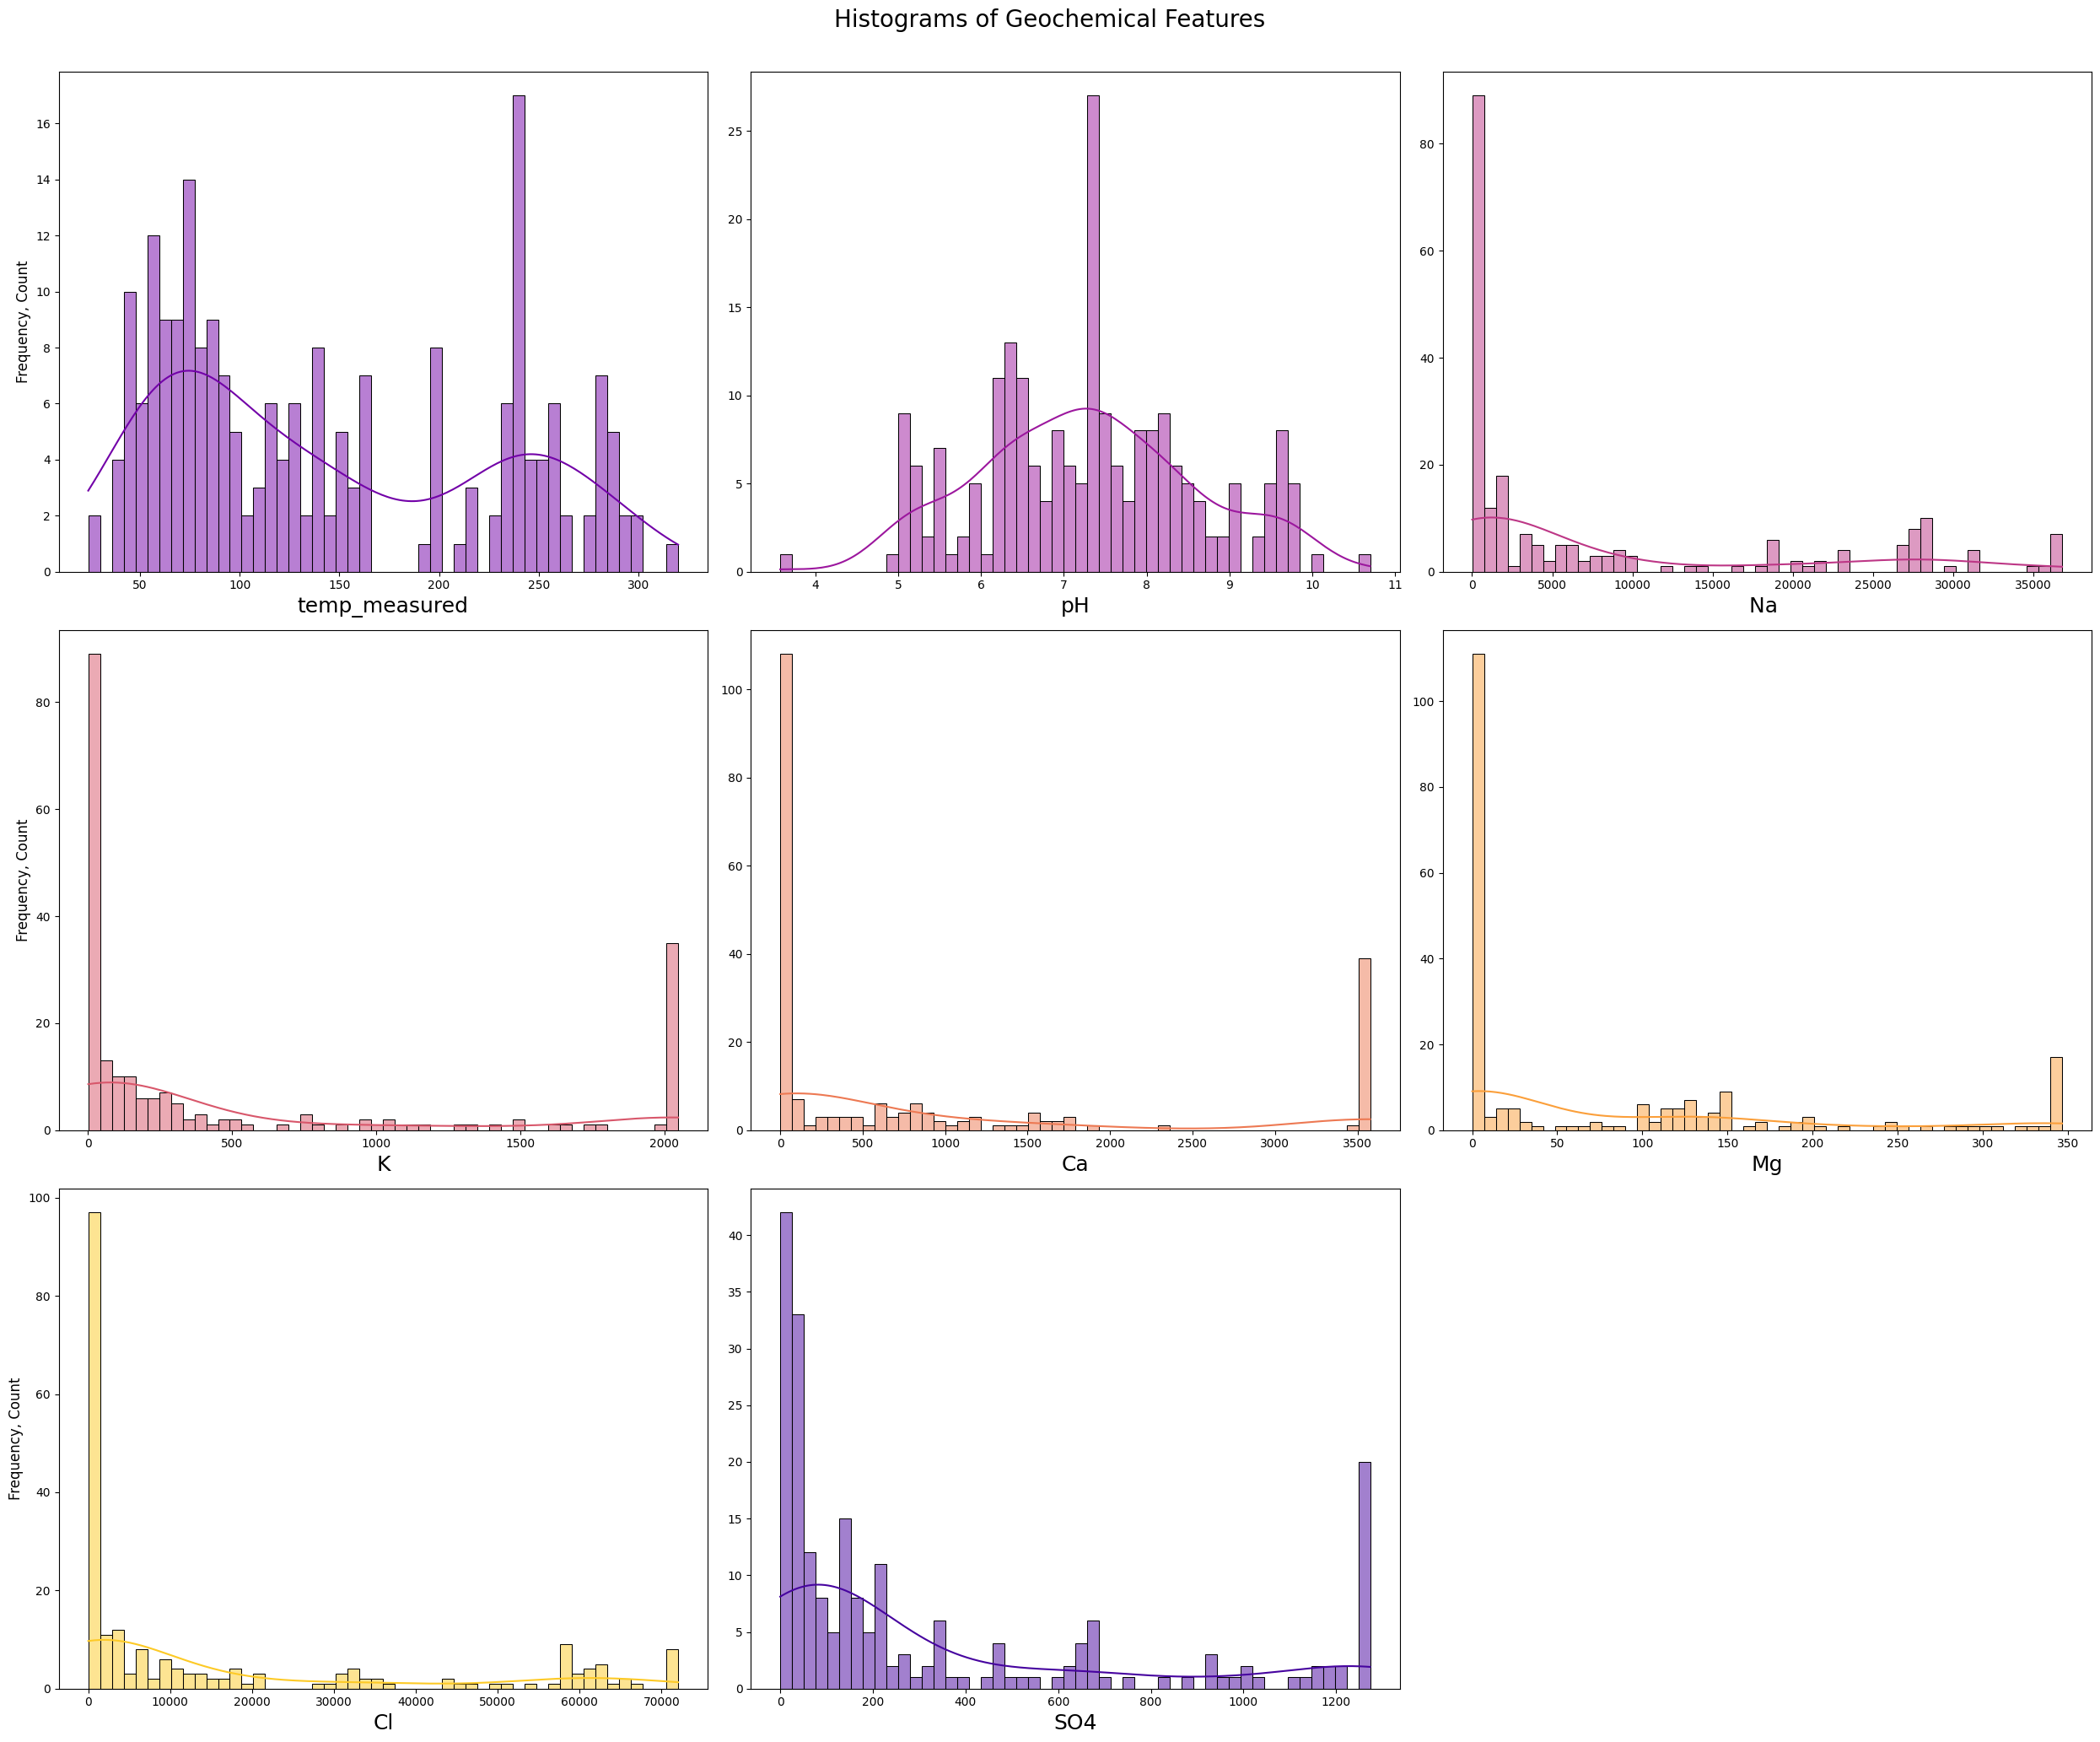

In [ ]:
### Distribution plots of geochemical features

numeric_cols = df_final.select_dtypes(include=["number"]).columns  
if not numeric_cols.empty:
    plt.figure(figsize=(25, 20))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
        sns.histplot(df_final[col], bins=50, kde=True, color=sns.color_palette("plasma", len(numeric_cols))[i % len(numeric_cols)])
        #plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col, fontsize=18)
        if (i - 1) % 3 == 0: 
            plt.ylabel('Frequency, Count', fontsize=12)
        else:
            plt.ylabel('')
    
    plt.tight_layout()
    plt.suptitle("Histograms of geochemical features", y=1.03, fontsize=20)
    #plt.savefig('histograms_geochemical_features.png')
    plt.show()
    plt.close()

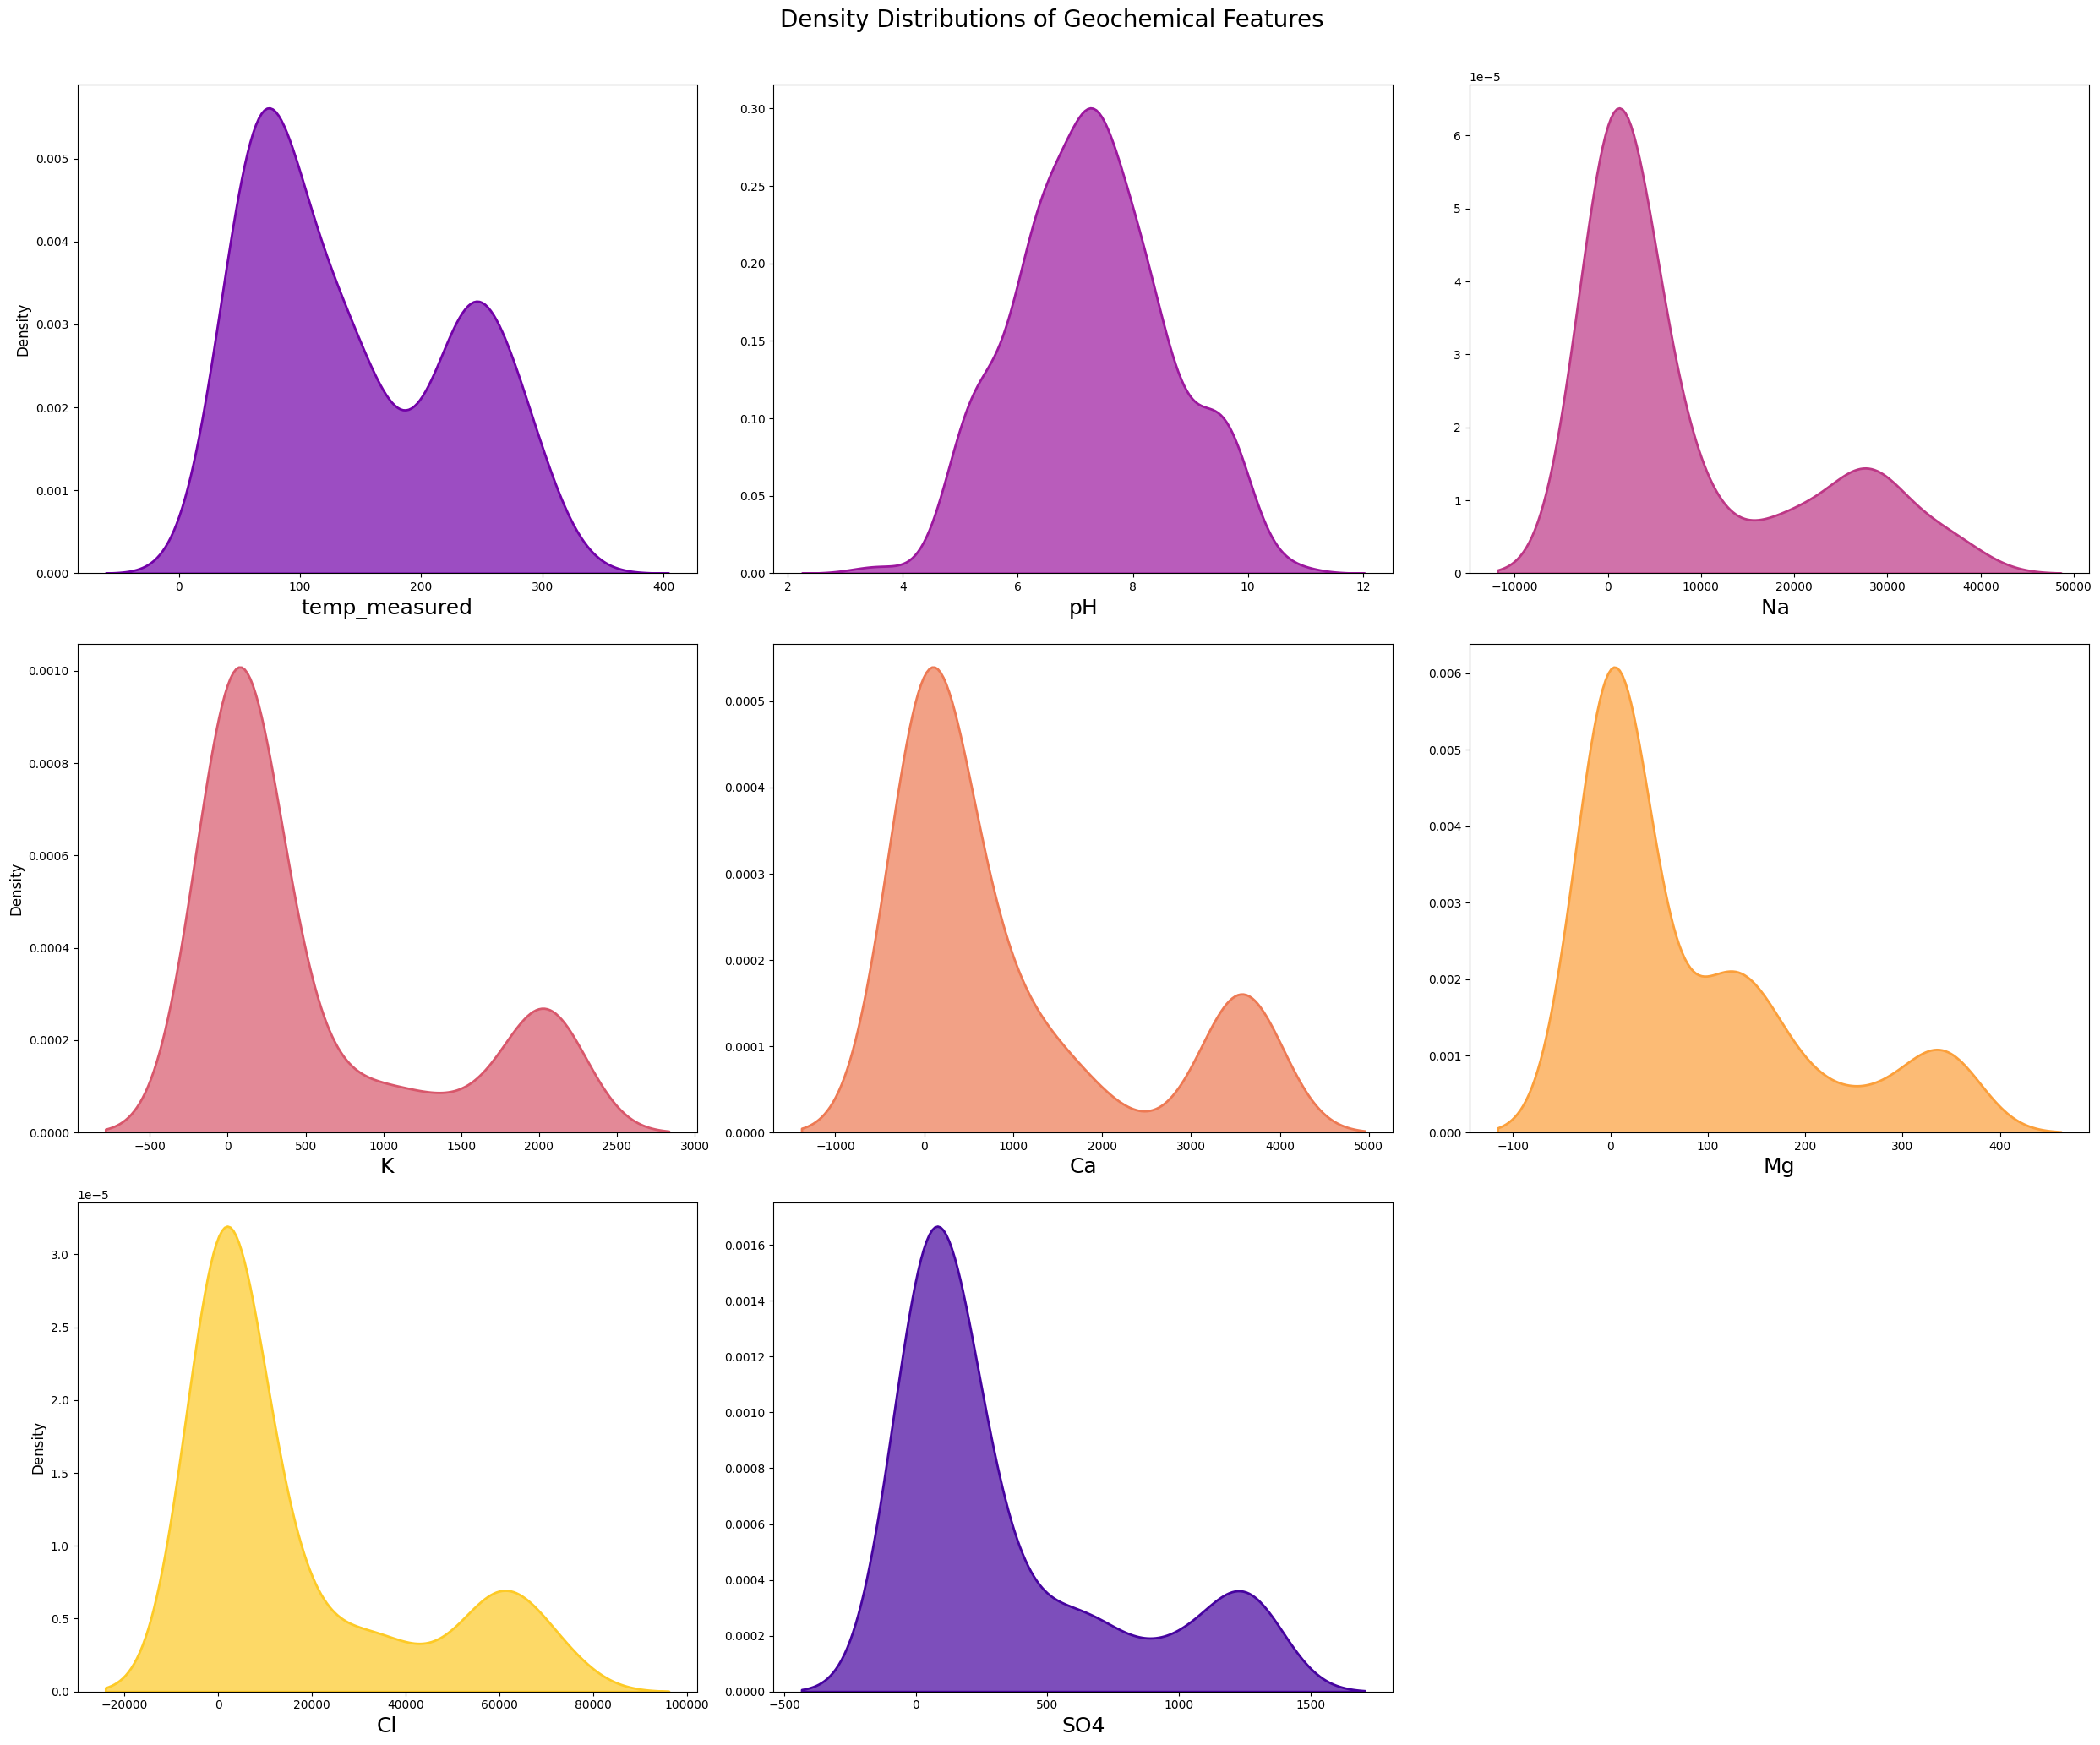

In [ ]:
### Distribution plots of geochemical features

hist_type = 'kde' # 'kde' or 'density'

numeric_cols = df_final.select_dtypes(include=["number"]).columns 

if not numeric_cols.empty:
    plt.figure(figsize=(25, 20))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols) // 3 + 1, 3, i)

        # Use kdeplot instead of histplot for density estimation
        if hist_type == 'kde':
        
            sns.kdeplot(
                data=df_final[col],
                fill=True,  
                color=sns.color_palette("plasma", len(numeric_cols))[i % len(numeric_cols)],
                alpha=0.7,
                linewidth=2
            )
        else:
            sns.histplot(
            data=df_final[col],
            bins=100,  
            stat="plasma",  
            kde=True, 
            color=sns.color_palette("plasma", len(numeric_cols))[i % len(numeric_cols)],
            alpha=0.5,  
            line_kws={'linewidth': 2}  
        )

        plt.xlabel(col, fontsize=18)
        if (i - 1) % 3 == 0: 
            plt.ylabel('Density', fontsize=12)  # Changed from Frequency to Density
        else:
            plt.ylabel('')
    
    plt.tight_layout()
    plt.suptitle("Density distributions of geochemical features", y=1.03, fontsize=20)
    #plt.savefig('density_geochemical_features.png')
    plt.show()
    plt.close()

## __Pair Plot__

### __Feature Relationships:__
- Visualize interactions between geochemical elements.
- Identify potential multicollinearity.
- Spot non-linear relationships.

### __Distribution Patterns:__
- See the distribution of each variable.
- Identify clusters or patterns.
- Detect outliers across multiple dimensions.

### __Category Insights:__
- If using hue, can reveal patterns by manifestation type.
- Help identify if certain relationships vary by geothermal system type.

### __Limitations to Consider:__
- Performance: Large datasets might slow rendering.
- Visual Clutter: Too many variables make it hard to interpret.
- Memory Usage: Could be intensive with your full dataset.

### __Best Practices:__
- Create multiple focused pair plots rather than one large plot.
- Use domain knowledge to select relevant feature combinations.
- onsider log-transforming highly skewed variables before plotting.

<Figure size 1500x1500 with 0 Axes>

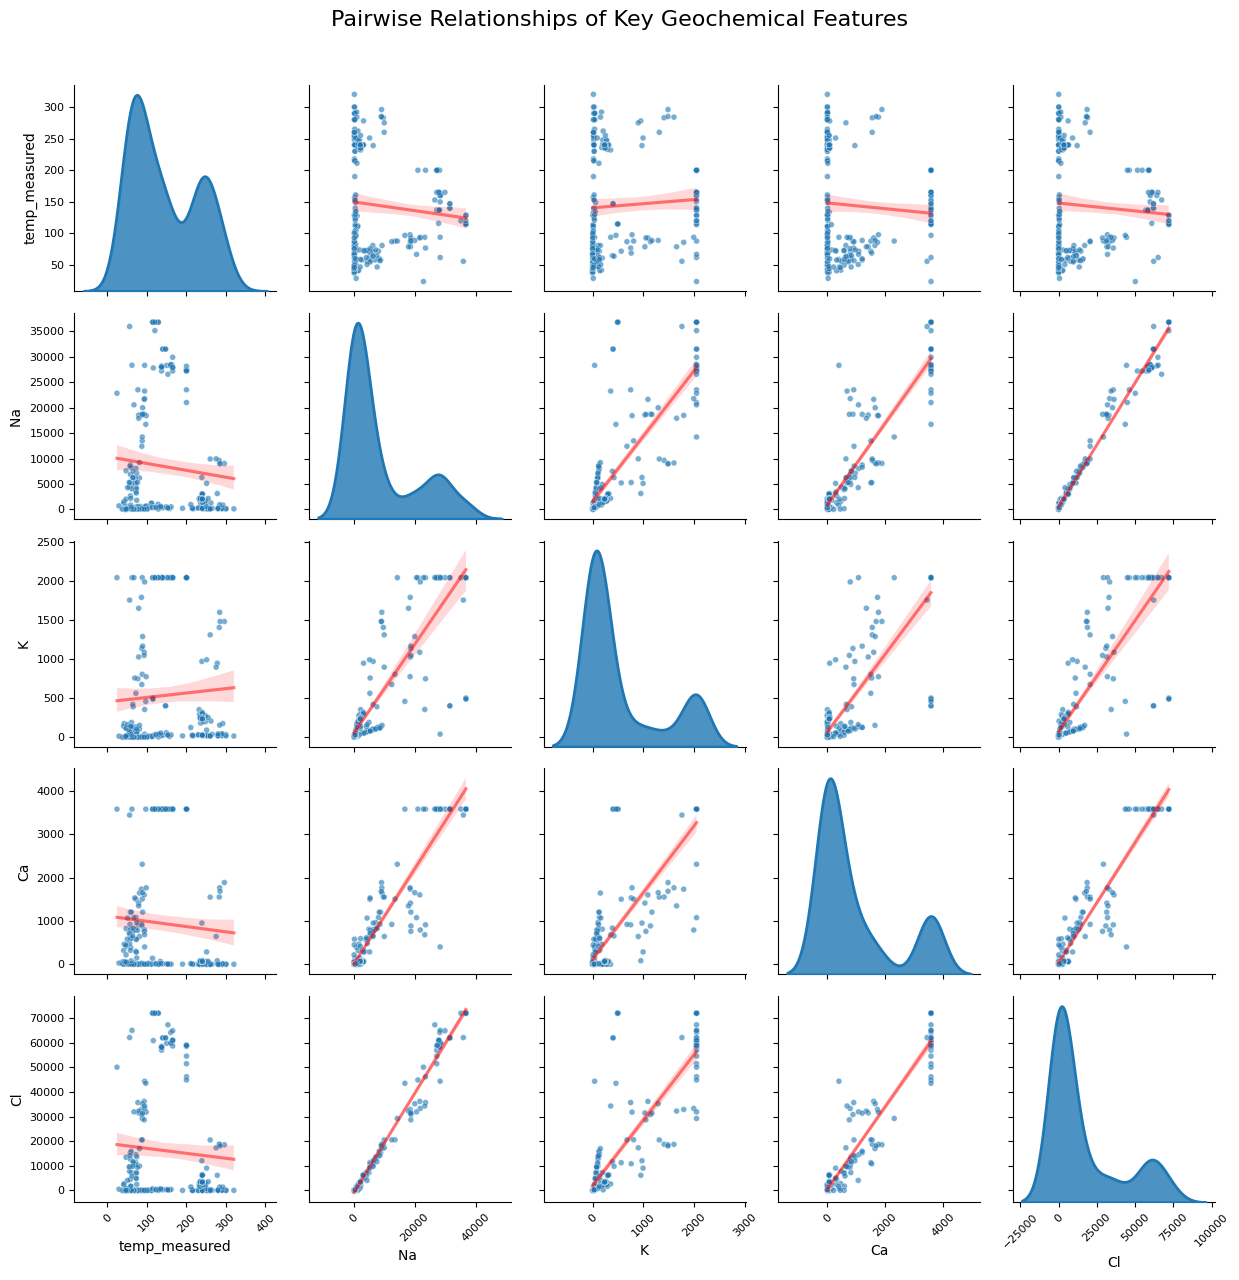

In [ ]:
### Pair plot

# Select most relevant features
important_features = ['temp_measured', 'Na ', 'K', 'Ca', 'Cl']

plt.figure(figsize=(15, 15))
pair_plot = sns.pairplot(
    data=df_final[important_features],
    diag_kind='kde',                    # 'kde' or 'hist'
    plot_kws={
        'alpha': 0.6,                   
        'size': 50,                       
        'edgecolor': 'white'            
    },
    diag_kws={
        'alpha': 0.8,                   
        'linewidth': 2                  
    }
)


plt.suptitle('Pairwise relationships of key geochemical features', y=1.02, fontsize=16)

for ax in pair_plot.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.setp(ax.get_yticklabels(), rotation=0)
    ax.tick_params(labelsize=8)

for i in range(len(important_features)):
    for j in range(len(important_features)):
        if i != j:
            ax = pair_plot.axes[i, j]
            sns.regplot(
                data=df_final,
                x=important_features[j],
                y=important_features[i],
                scatter=False,
                ax=ax,
                color='red',
                line_kws={'alpha': 0.5}
            )

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
### Combine datasets, three methods. 

# Method 1: Merge datasets on common columns
def merge_datasets(df1, df2, merge_on, how='inner'):
    """
    Merge two datasets based on common columns
    
    Parameters:
    -----------
    df1: First DataFrame
    df2: Second DataFrame
    merge_on: Column(s) to merge on
    how: Type of merge ('inner', 'outer', 'left', 'right')
    """
    merged_df = pd.merge(df1, df2, on=merge_on, how=how)
    return merged_df

# Method 2: Concatenate rows
def concat_rows(df1, df2):
    """
    Concatenate two datasets vertically (stack rows)
    Assumes both datasets have the same columns
    """
    combined_df = pd.concat([df1, df2], axis=0, ignore_index=True)
    return combined_df

# Method 3: Concatenate columns
def concat_columns(df1, df2):
    """
    Concatenate two datasets horizontally (stack columns)
    Assumes both datasets have the same number of rows
    """
    combined_df = pd.concat([df1, df2], axis=1)
    return combined_df

# Usage example:
df1 = pd.read_csv("csv/final_dataset.csv")
df2 = pd.read_csv("csv/final_dataset_GDR_VF.csv")

# Merge on common column
merged_df = merge_datasets(df1, df2, merge_on='common_column')

# Stack rows
# stacked_df = concat_rows(df1, df2)

# Stack columns
# combined_df = concat_columns(df1, df2)

df = df.rename(columns={'temp_measured': 'temperature'})

df1 = pd.read_csv("csv/final_dataset.csv")
df2 = pd.read_csv("csv/final_dataset_GDR_VF.csv")

df1 = df1.rename(columns={'Na ': 'Na'})

print("=== Dataset 1 Columns ===")
print(df1.columns.tolist())
print("\n=== Dataset 2 Columns ===")
print(df2.columns.tolist())

# Since we're working with geothermal data, we can use 'well_sample' as the common identifier
# If the datasets have the same columns, we can use concat_rows instead of merge

# Check if columns match
columns_match = set(df1.columns) == set(df2.columns)
print("\nColumns match:", columns_match)

if columns_match:
    # Use concat_rows if columns match
    stacked_df = concat_rows(df1, df2)
    print("\nCombined shape:", stacked_df.shape)
    print("Original shapes:", df1.shape, df2.shape)
else:
    # If columns don't match exactly, we can merge on 'well_sample'
    if 'well_sample' in df1.columns and 'well_sample' in df2.columns:
        merged_df = merge_datasets(df1, df2, merge_on='well_sample', how='outer')
        print("\nMerged shape:", merged_df.shape)
        print("Original shapes:", df1.shape, df2.shape)
    else:
        print("\nNo common identifier column found")

# Check the combined dataset
def check_combined_dataset(df):
    """Check the quality of the combined dataset"""
    print("\n=== Combined Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nDuplicate rows:", df.duplicated().sum())
    
    # Check for duplicate well samples if that column exists
    if 'well_sample' in df.columns:
        well_duplicates = df['well_sample'].duplicated().sum()
        print(f"Duplicate well samples: {well_duplicates}")
        if well_duplicates > 0:
            print("\nDuplicate well samples:")
            print(df[df['well_sample'].duplicated(keep=False)].sort_values('well_sample'))

# Save the combined dataset
def save_combined_dataset(df, filename='csv/combined_dataset.csv'):
    df.to_csv(filename, index=False)
    print(f"\nCombined dataset saved to: {filename}")

# Run the checks and save
if 'stacked_df' in locals():
    check_combined_dataset(stacked_df)
    save_combined_dataset(stacked_df)
elif 'merged_df' in locals():
    check_combined_dataset(merged_df)
    save_combined_dataset(merged_df)

=== Dataset Overview ===
Shape: (216, 9)

Memory usage: 0.01 MB

=== Column Information ===

Datatypes:
well_sample     object
temperature      int64
pH             float64
Na             float64
K              float64
Ca             float64
Mg             float64
Cl             float64
SO4            float64
dtype: object

=== Missing Values ===
     Missing Values  Percentage
pH               16    7.407407
K                 1    0.462963
Mg                1    0.462963
SO4               6    2.777778

=== Duplicates ===
Number of duplicate rows: 0

=== Basic Statistics ===
       temperature      pH       Na         K        Ca       Mg         Cl  \
count       216.00  200.00    216.00   215.00    216.00   215.00     216.00   
mean        144.06    7.28   8813.84   740.24   1589.92   109.22   16953.12   
std          82.55    1.36  12868.68  1220.00   2772.61   248.61   25812.20   
min          24.00    3.10      5.70     0.74      0.00     0.00       2.00   
25%          72.00    

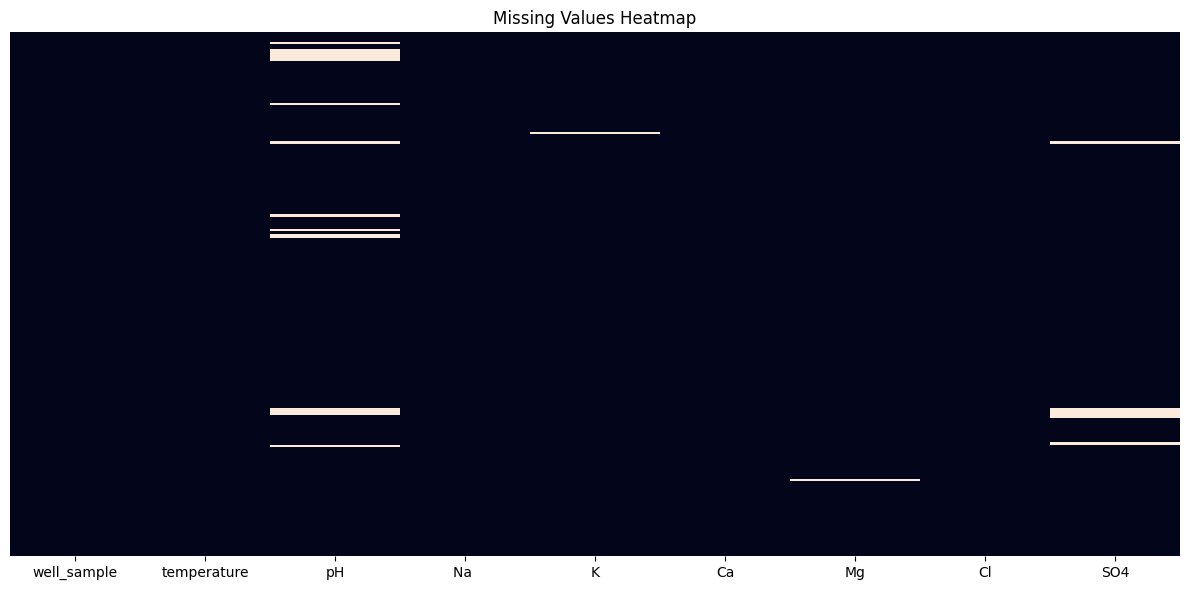

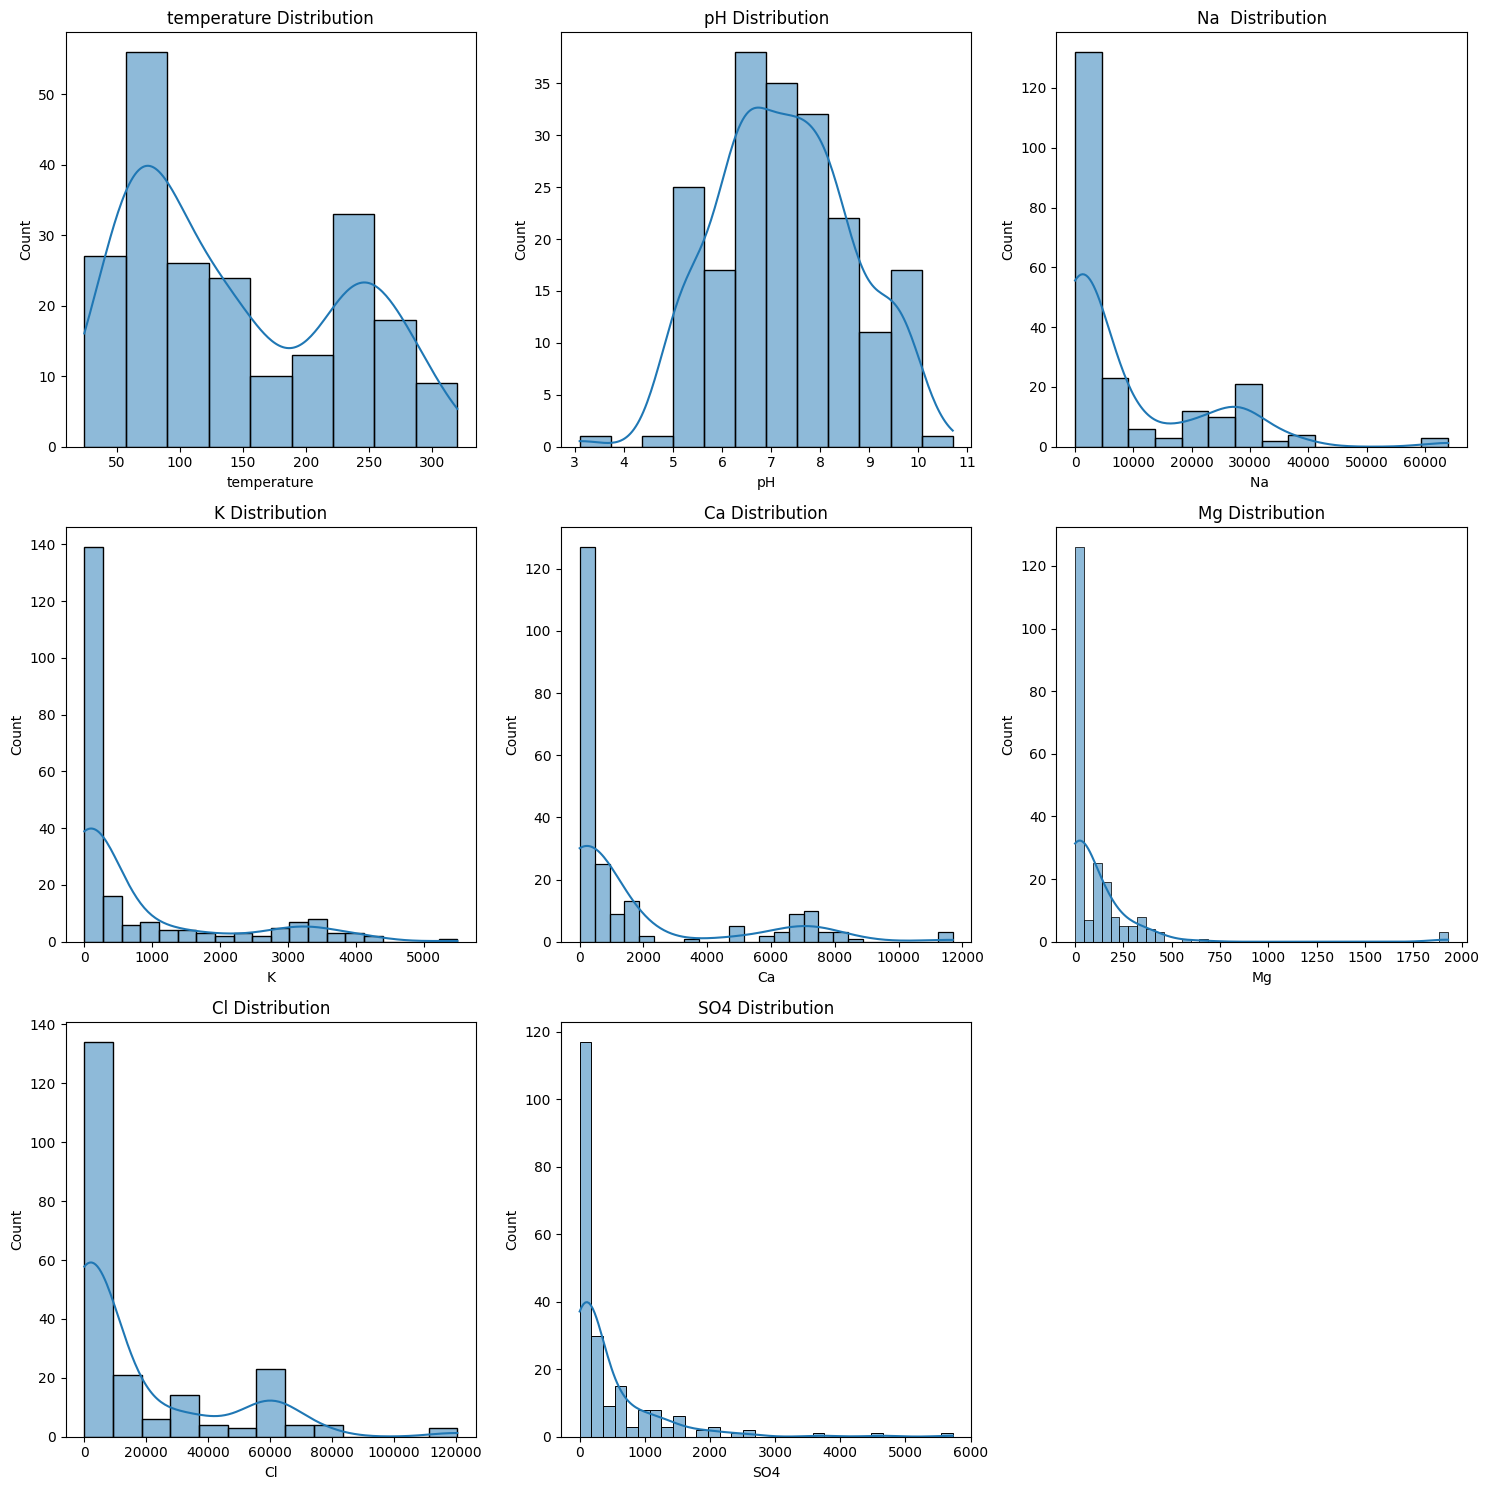

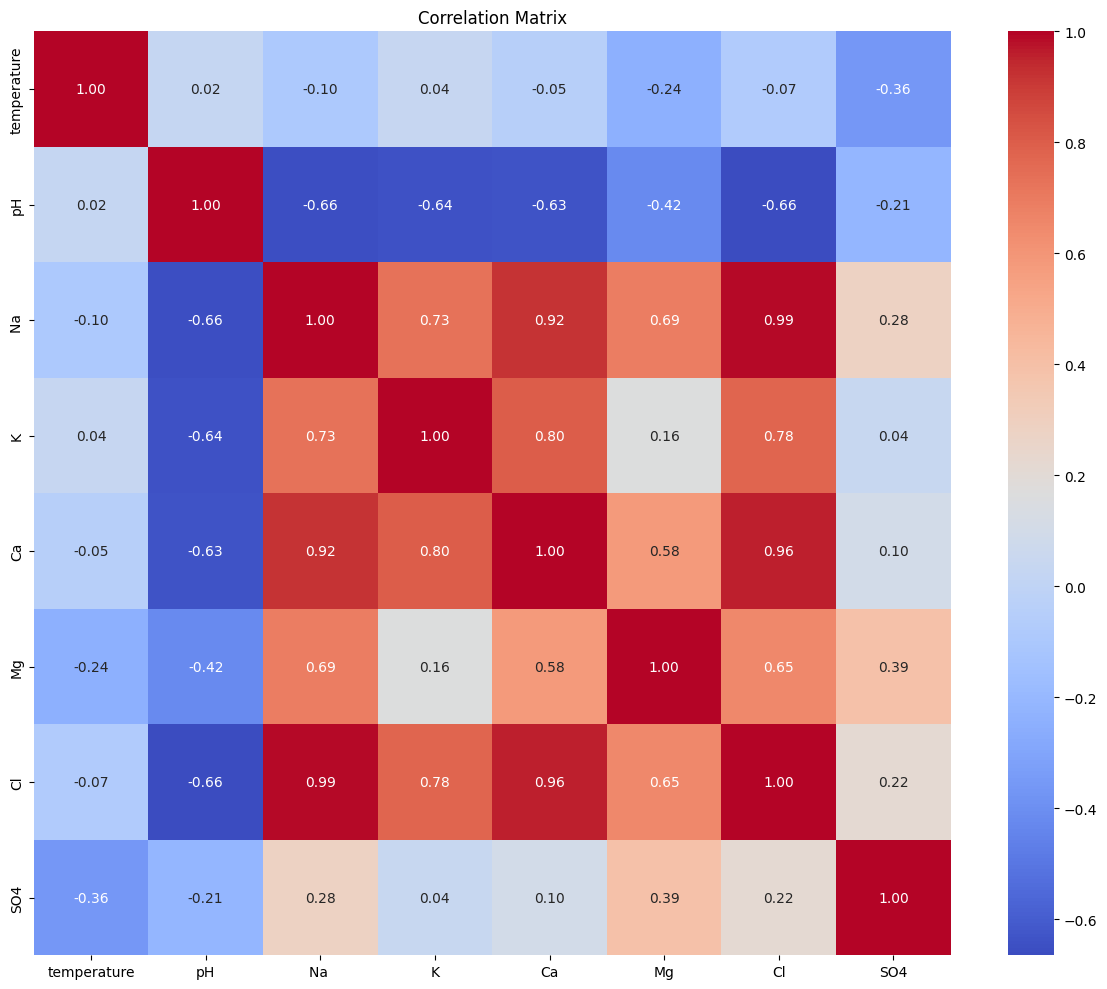

In [14]:
def check_combined_dataset(df, show_plots=True):
    """
    Perform comprehensive checks on the combined dataset
    
    Parameters:
    -----------
    df : pandas DataFrame
        The combined dataset to check
    show_plots : bool
        Whether to display visualization plots
    """
    print("=== Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print(f"\nMemory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    
    print("\n=== Column Information ===")
    print("\nDatatypes:")
    print(df.dtypes)
    
    print("\n=== Missing Values ===")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_pct
    })
    print(missing_info[missing_info['Missing Values'] > 0])
    
    print("\n=== Duplicates ===")
    print(f"Number of duplicate rows: {df.duplicated().sum()}")
    
    print("\n=== Basic Statistics ===")
    print(df.describe().round(2))
    
    if show_plots:
        # Missing values heatmap
        plt.figure(figsize=(12, 6))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title('Missing Values Heatmap')
        plt.tight_layout()
        plt.show()
        
        # Distribution plots for numeric columns
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        n_cols = len(numeric_cols)
        n_rows = (n_cols + 2) // 3  # Ceiling division
        
        plt.figure(figsize=(15, 5*n_rows))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(n_rows, 3, i)
            sns.histplot(df[col], kde=True)
            plt.title(f'{col} Distribution')
        plt.tight_layout()
        plt.show()
        
        # Correlation heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
    return missing_info[missing_info['Missing Values'] > 0]

# After combining datasets, use the check function:
# For example, after your merge operation:
#merged_df = merge_datasets(df1, df2, merge_on='common_column')
missing_info = check_combined_dataset(df)




In [ ]:
# Count plots for categorical features
categorical_columns = ['manifestation_type', 'geothermal_system']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 1, i+1)
    top_categories = df_final[column].value_counts().nlargest(25).index
    sns.countplot(x=column, data=df_final[df_final[column].isin(top_categories)], palette="cividis", hue=column)
    #plt.title(column, fontsize=18)
    plt.xticks(rotation=45, fontsize=14)
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.suptitle("Count Plots of Manifestation Type and Geothermal System", y=1.03, fontsize=18)
plt.show()

# plt.savefig('categorical_distributions.png')
plt.close()